# Analysis of Palmer Penguins Dataset
- Thực hiện: Nguyễn Văn Khánh

This notebook analyzes the Palmer Penguins dataset using decision trees to predict penguin species based on physical characteristics.

## Objectives:
1. Load and preprocess the dataset
2. Split data into multiple train/test sets with different ratios
3. Visualize class distributions
4. Train decision tree models
5. Evaluate model performance
6. Analyze the effect of tree depth on accuracy

## Setup and Imports

In [2]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Check if scikit-learn and other required packages are installed
try:
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    print("sklearn.impute.IterativeImputer is available.")
except ImportError as e:
    print(f"WARNING: {str(e)}")
    print("Installing required packages...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn>=1.0"])
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    print("Successfully installed and imported IterativeImputer.")

# Import custom modules
# Add parent directory to path to ensure imports work
current_dir = os.getcwd()
parent_dir = os.path.join(current_dir, "../..")
src_dir = os.path.join(parent_dir, "src")
sys.path.insert(0, parent_dir)
sys.path.insert(0, src_dir)
print(f"Added to sys.path: {parent_dir}")
print(f"Added to sys.path: {src_dir}")

try:
    from src.preprocessing import load_and_preprocess
    from src.split_data import create_splits
    from src.tree_utils import train_decision_tree, evaluate_model, analyze_tree_depth, visualize_tree
    print("Successfully imported custom modules.")
except ImportError as e:
    print(f"Error importing custom modules: {str(e)}")
    print("Current sys.path:")
    for p in sys.path:
        print(f"  - {p}")
    
    # Try alternative import method
    print("\nTrying alternative import...")
    try:
        sys.path.insert(0, os.path.abspath("../../src"))
        from preprocessing import load_and_preprocess
        from split_data import create_splits
        from tree_utils import train_decision_tree, evaluate_model, analyze_tree_depth, visualize_tree
        print("Successfully imported custom modules with alternative method.")
    except ImportError as e2:
        print(f"Alternative import also failed: {str(e2)}")
        raise

# Create organized output directories
base_results_dir = "../../results/palmer_penguins"
base_viz_dir = "../../visualizations/palmer_penguins"

# Create all necessary subdirectories
directories = [
    f"{base_results_dir}/class_distributions",
    f"{base_results_dir}/confusion_matrices", 
    f"{base_results_dir}/accuracy_tables",
    f"{base_results_dir}/classification_reports",
    f"{base_results_dir}/decision_tree",
    f"{base_viz_dir}/class_distributions",
    f"{base_viz_dir}/confusion_matrices",
    f"{base_viz_dir}/accuracy_plots",
    f"{base_viz_dir}/decision_tree"
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)
    print(f"Created directory: {directory}")

print("All output directories created successfully!")

sklearn.impute.IterativeImputer is available.
Added to sys.path: d:\Đại Học\Kì 2 - Năm 3\Cơ Sở AI\Đồ Án Thực Hành\Decision-Tree\AI-Decision-Tree\notebooks\palmer_penguins_dataset\../..
Added to sys.path: d:\Đại Học\Kì 2 - Năm 3\Cơ Sở AI\Đồ Án Thực Hành\Decision-Tree\AI-Decision-Tree\notebooks\palmer_penguins_dataset\../..\src
Successfully imported custom modules.
Created directory: ../../results/palmer_penguins/class_distributions
Created directory: ../../results/palmer_penguins/confusion_matrices
Created directory: ../../results/palmer_penguins/accuracy_tables
Created directory: ../../results/palmer_penguins/classification_reports
Created directory: ../../results/palmer_penguins/decision_tree
Created directory: ../../visualizations/palmer_penguins/class_distributions
Created directory: ../../visualizations/palmer_penguins/confusion_matrices
Created directory: ../../visualizations/palmer_penguins/accuracy_plots
Created directory: ../../visualizations/palmer_penguins/decision_tree
All o

## Step 1: Load and Preprocess Data

In [3]:
# Load and preprocess the data
import os

# Đường dẫn tuyệt đối và tương đối để thử
absolute_data_path = os.path.abspath("../../datasets/palmer_penguins/penguins.csv")
relative_data_path = "../../datasets/palmer_penguins/penguins.csv"
data_path = relative_data_path if os.path.exists(relative_data_path) else absolute_data_path

# Kiểm tra tồn tại của file
if not os.path.exists(data_path):
    print(f"ERROR: File không tồn tại: {data_path}")
    print(f"Thư mục hiện tại: {os.getcwd()}")
    print("Kiểm tra các thư mục:")
    for root, dirs, files in os.walk("../.."):
        print(f"Thư mục: {root}")
        for file in files:
            if "penguin" in file.lower():
                print(f"  - {file}")
else:
    print(f"File tồn tại: {data_path}")
    
try:
    # Thử đọc file raw trước khi xử lý
    import pandas as pd
    raw_data = pd.read_csv(data_path)
    print("\nDữ liệu thô (5 dòng đầu):")
    print(raw_data.head())
    print("\nThông tin về dữ liệu thô:")
    print(f"Số dòng: {raw_data.shape[0]}, Số cột: {raw_data.shape[1]}")
    print("Các cột:", raw_data.columns.tolist())
    print("\nKiểm tra giá trị thiếu:")
    print(raw_data.isnull().sum())
    
    # Gọi hàm load_and_preprocess
    print("\n--- Bắt đầu tiền xử lý dữ liệu ---")
    X, y = load_and_preprocess(data_path)

    # Display the first few rows of processed features
    print("\nProcessed features:")
    print(X.head())

    # Display target distribution
    print("\nTarget distribution:")
    print(y.value_counts())

    # Add imbalance ratio
    print(f"\nClass imbalance ratio: {y.value_counts().max()}/{y.value_counts().min()} = {y.value_counts().max()/y.value_counts().min():.2f}")
    
except Exception as e:
    print(f"ERROR: Có lỗi khi đọc hoặc xử lý file: {e}")
    import traceback
    traceback.print_exc()

File tồn tại: ../../datasets/palmer_penguins/penguins.csv

Dữ liệu thô (5 dòng đầu):
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Thông tin về dữ liệu thô:
Số dòng: 344, Số cột: 8
Các cột: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']

Kiểm tra giá trị thiếu:
species               0
island                0
bill_length_mm        2
bill_depth_mm      

d:\Đại Học\Kì 2 - Năm 3\Cơ Sở AI\Đồ Án Thực Hành\Decision-Tree\AI-Decision-Tree\notebooks\palmer_penguins_dataset\../..\src\preprocessing.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


## Step 2: Create Multiple Train/Test Splits

In [4]:
# Create multiple train/test splits
splits = create_splits(X, y)
split_ratios = ["40-60", "60-40", "80-20", "90-10"]

print(f"Created {len(splits)} different train/test splits with ratios: {', '.join(split_ratios)}")

# Display the size of each split
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Split {i+1} ({split_ratios[i]}):\n")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples\n")

Tạo split với tỷ lệ train/test = 0.4/0.6
  - Train set: 137 mẫu, 8 đặc trưng
  - Test set: 207 mẫu, 8 đặc trưng
  - Train class distribution: {'Adelie': 61, 'Gentoo': 49, 'Chinstrap': 27}
  - Test class distribution: {'Adelie': 91, 'Gentoo': 75, 'Chinstrap': 41}
Tạo split với tỷ lệ train/test = 0.6/0.4
  - Train set: 206 mẫu, 8 đặc trưng
  - Test set: 138 mẫu, 8 đặc trưng
  - Train class distribution: {'Adelie': 91, 'Gentoo': 74, 'Chinstrap': 41}
  - Test class distribution: {'Adelie': 61, 'Gentoo': 50, 'Chinstrap': 27}
Tạo split với tỷ lệ train/test = 0.8/0.19999999999999996
  - Train set: 275 mẫu, 8 đặc trưng
  - Test set: 69 mẫu, 8 đặc trưng
  - Train class distribution: {'Adelie': 122, 'Gentoo': 99, 'Chinstrap': 54}
  - Test class distribution: {'Adelie': 30, 'Gentoo': 25, 'Chinstrap': 14}
Tạo split với tỷ lệ train/test = 0.9/0.09999999999999998
  - Train set: 309 mẫu, 8 đặc trưng
  - Test set: 35 mẫu, 8 đặc trưng
  - Train class distribution: {'Adelie': 137, 'Gentoo': 111, 'Chinst

## Step 3: Visualize Class Distribution in Each Split

In [5]:
def plot_class_distribution(y_train, y_test, split_id, split_ratio):
    """Plot the class distribution in train and test sets"""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train set distribution
    sns.countplot(x=y_train, ax=axs[0], palette="viridis")
    axs[0].set_title(f"Training Set ({split_ratio} Split)")
    axs[0].set_xlabel("Penguin Species")
    axs[0].set_ylabel("Count")
    
    # Test set distribution
    sns.countplot(x=y_test, ax=axs[1], palette="viridis")
    axs[1].set_title(f"Test Set ({split_ratio} Split)")
    axs[1].set_xlabel("Penguin Species")
    axs[1].set_ylabel("Count")
    
    plt.tight_layout()
    
    # Save to organized subdirectory
    save_path = f"../../results/palmer_penguins/class_distributions/class_distribution_split_{split_id+1}_{split_ratio.replace('/', '_')}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved class distribution plot to {save_path}")
    return fig

C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../../results/palmer_penguins/class_distributions/class_distribution_split_1_40-60.png


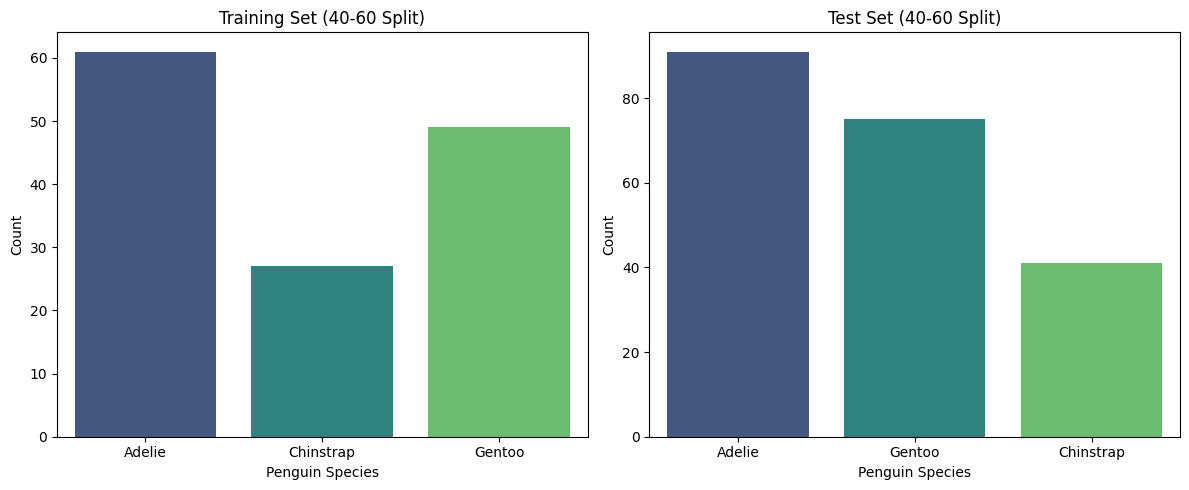

C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../../results/palmer_penguins/class_distributions/class_distribution_split_2_60-40.png


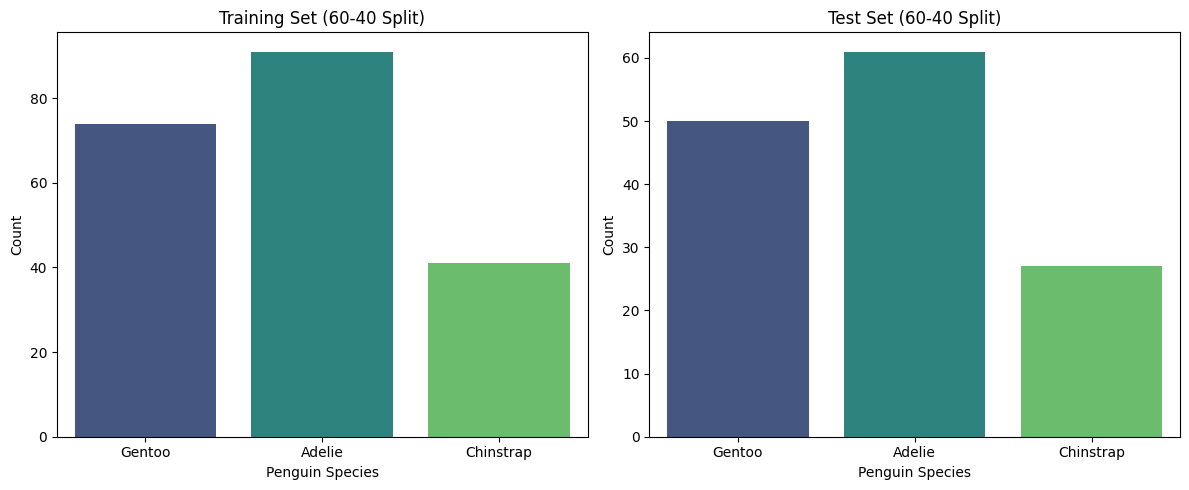

C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../../results/palmer_penguins/class_distributions/class_distribution_split_3_80-20.png


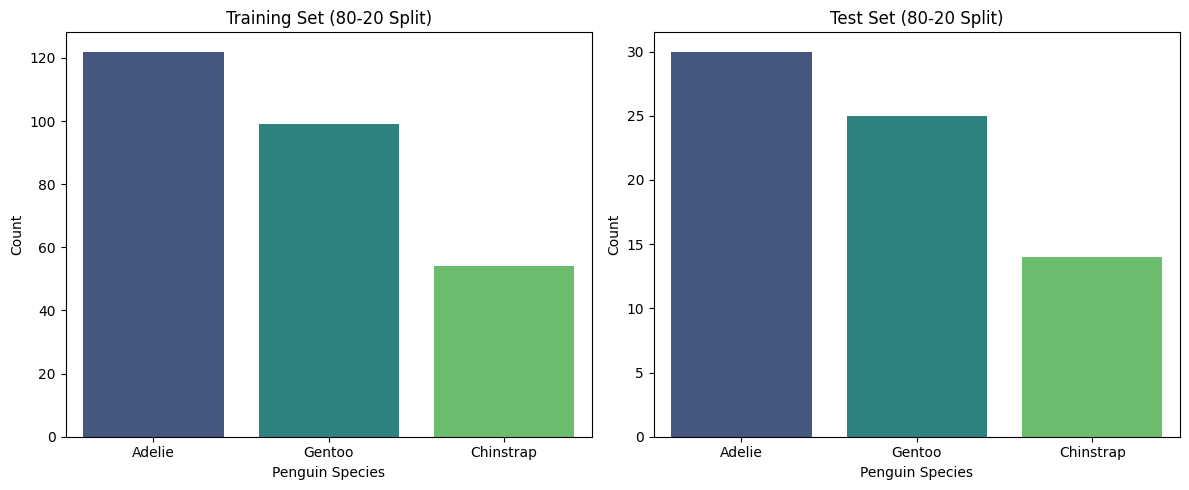

C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_4492\1744180610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


Saved class distribution plot to ../../results/palmer_penguins/class_distributions/class_distribution_split_4_90-10.png


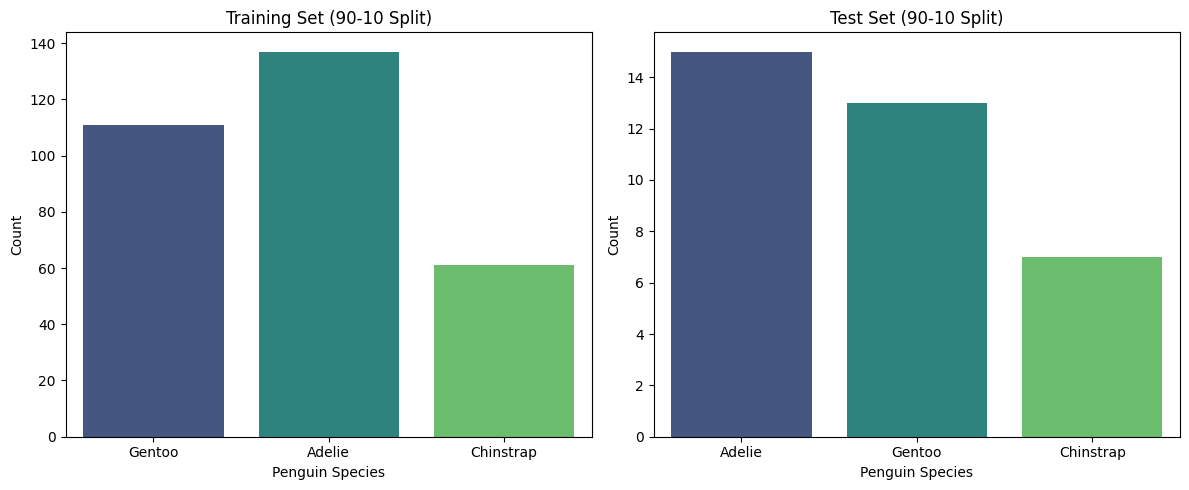

In [6]:
# Plot class distribution for each split
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    fig = plot_class_distribution(y_train, y_test, i, split_ratios[i])
    plt.show()

## Step 4: Train Decision Tree Models

In [7]:
# Train decision trees for each split
models = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Training model on split {i+1} ({split_ratios[i]})...")
    model = train_decision_tree(X_train, y_train)
    models.append(model)
    print(f"Model trained with {model.tree_.node_count} nodes")

Training model on split 1 (40-60)...
Model trained with 13 nodes
Training model on split 2 (60-40)...
Model trained with 17 nodes
Training model on split 3 (80-20)...
Model trained with 25 nodes
Training model on split 4 (90-10)...
Model trained with 25 nodes


## Step 5: Evaluate Models


Evaluating model trained on split 1 (40-60):
Test Accuracy: 0.9517
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_1_40-60.png
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_1_40-60.png


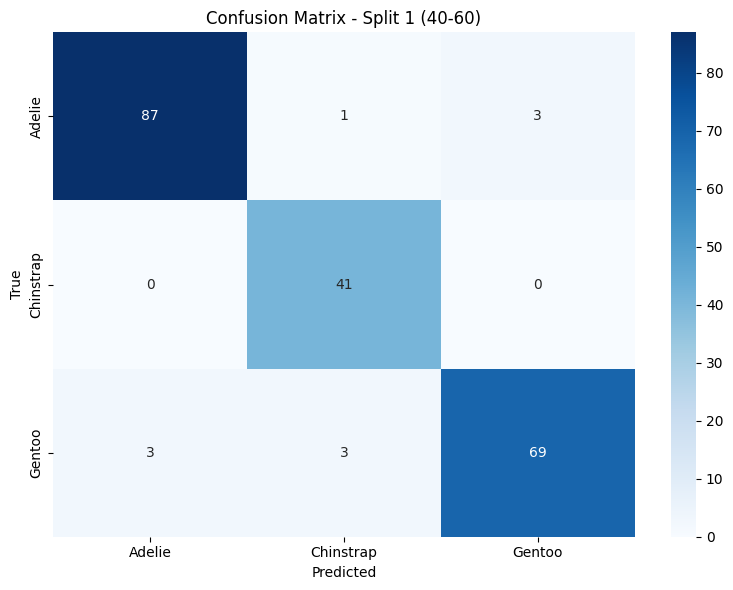

Saved classification report to ../../results/palmer_penguins/classification_reports/classification_report_split_1_40-60.txt

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        91
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       0.96      0.92      0.94        75

    accuracy                           0.95       207
   macro avg       0.95      0.96      0.95       207
weighted avg       0.95      0.95      0.95       207


Evaluating model trained on split 2 (60-40):
Test Accuracy: 0.9783
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_2_60-40.png
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_2_60-40.png


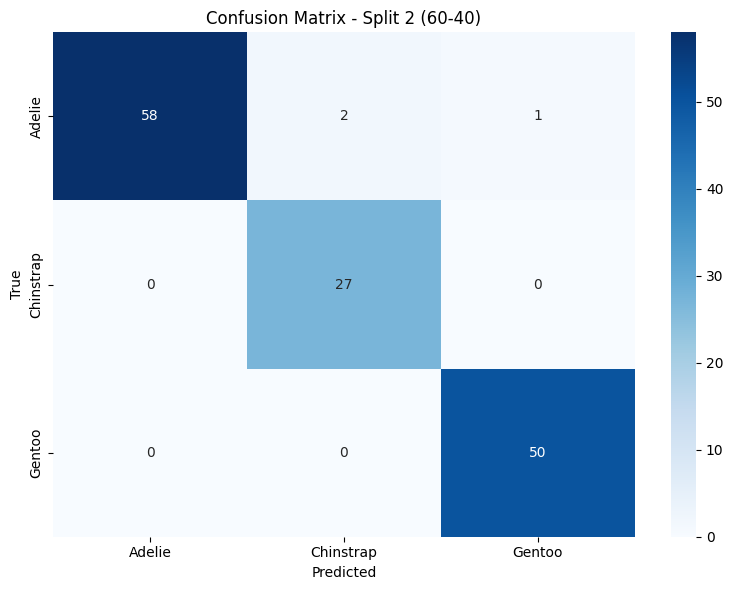

Saved classification report to ../../results/palmer_penguins/classification_reports/classification_report_split_2_60-40.txt

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        61
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       0.98      1.00      0.99        50

    accuracy                           0.98       138
   macro avg       0.97      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138


Evaluating model trained on split 3 (80-20):
Test Accuracy: 0.9855
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_3_80-20.png
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_3_80-20.png


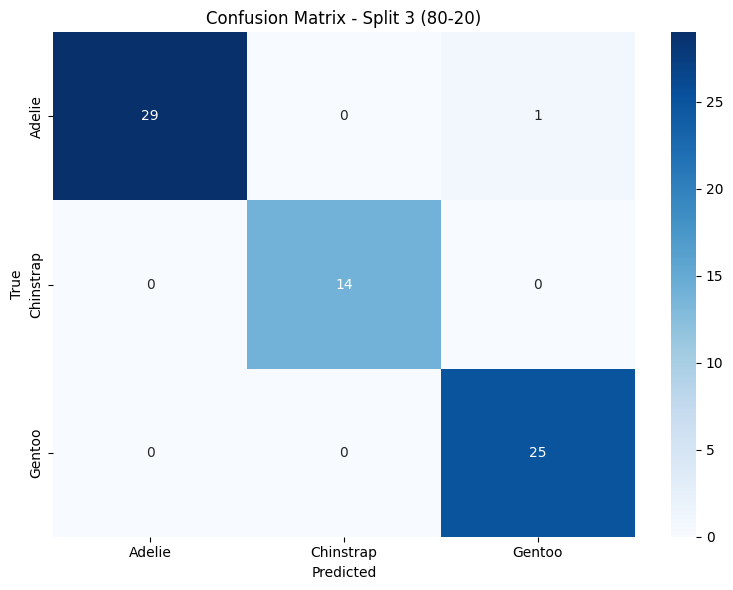

Saved classification report to ../../results/palmer_penguins/classification_reports/classification_report_split_3_80-20.txt

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69


Evaluating model trained on split 4 (90-10):
Test Accuracy: 1.0000
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_4_90-10.png
Saved confusion matrix to ../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_4_90-10.png


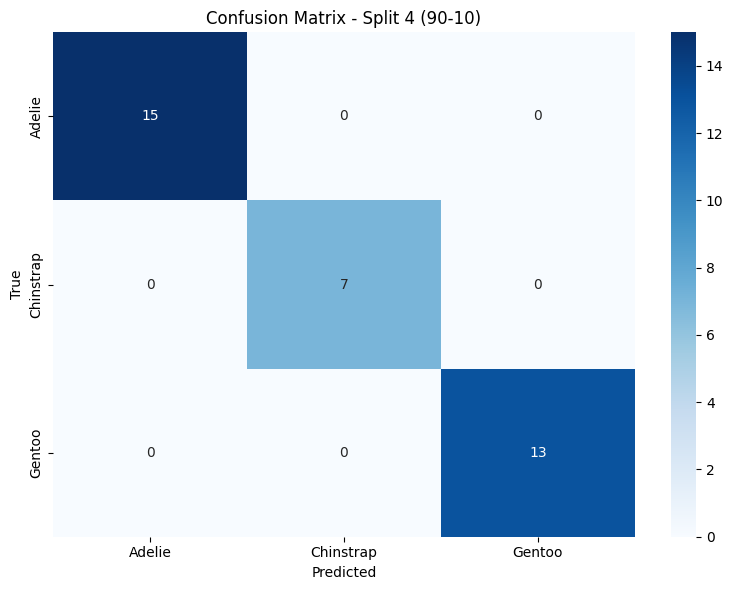

Saved classification report to ../../results/palmer_penguins/classification_reports/classification_report_split_4_90-10.txt

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [8]:
# Evaluate each model
evaluation_results = []

for i, ((X_train, X_test, y_train, y_test), model) in enumerate(zip(splits, models)):
    print(f"\nEvaluating model trained on split {i+1} ({split_ratios[i]}):")
    
    # Evaluate on test set
    result = evaluate_model(model, X_test, y_test, i+1)
    evaluation_results.append(result)
    
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix - Split {i+1} ({split_ratios[i]})")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    
    # Save to organized subdirectory
    confusion_path = f"../../results/palmer_penguins/confusion_matrices/confusion_matrix_split_{i+1}_{split_ratios[i].replace('/', '_')}.png"
    plt.savefig(confusion_path, dpi=300, bbox_inches='tight')
    print(f"Saved confusion matrix to {confusion_path}")
    plt.show()
    
    # Save classification report to organized subdirectory
    report_path = f"../../results/palmer_penguins/classification_reports/classification_report_split_{i+1}_{split_ratios[i].replace('/', '_')}.txt"
    with open(report_path, 'w') as f:
        f.write(f"Classification Report - Split {i+1} ({split_ratios[i]})\n")
        f.write("="*50 + "\n")
        f.write(result['report'])
        f.write(f"\nTest Accuracy: {result['accuracy']:.4f}\n")
    print(f"Saved classification report to {report_path}")
    
    # Print the classification report
    print("\nClassification Report:")
    print(result['report'])

## Step 6: Analyze the Effect of Tree Depth

In [9]:
# Use the 80/20 split (index 2) for depth analysis
X_train, X_test, y_train, y_test = splits[2]
depths = [None, 2, 3, 4, 5, 6, 7]

# Analyze performance across different depths
depth_results = analyze_tree_depth(X_train, X_test, y_train, y_test, depths)

# Save depth analysis results to organized subdirectory
depth_results_path = "../../results/palmer_penguins/accuracy_tables/depth_analysis_results.csv"
depth_results.to_csv(depth_results_path, index=False)
print(f"Saved depth analysis results to {depth_results_path}")

# Display results
print("Accuracy by Tree Depth:")
print(depth_results)

Saved depth analysis results to ../../results/palmer_penguins/accuracy_tables/depth_analysis_results.csv
Accuracy by Tree Depth:
   max_depth  accuracy
0  Unlimited  0.985507
1          2  0.971014
2          3  0.971014
3          4  0.985507
4          5  0.985507
5          6  0.985507
6          7  0.985507


Saved accuracy vs depth plot to ../../results/palmer_penguins/accuracy_tables/accuracy_vs_depth.png


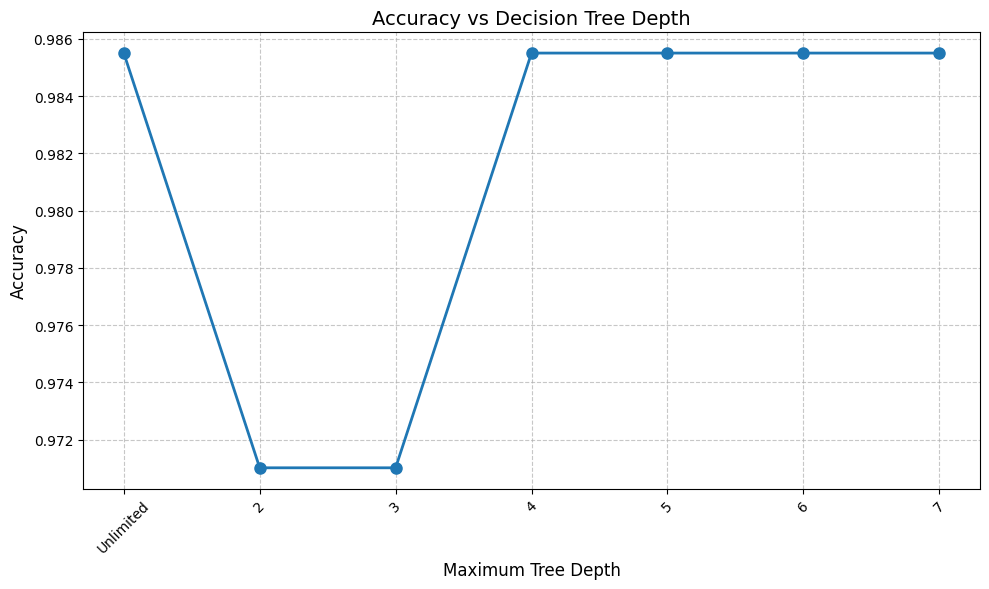

In [10]:
# Plot the accuracy vs depth
plt.figure(figsize=(10, 6))
# Chuyển đổi cột max_depth sang dạng string để tránh lỗi
depth_labels = [str(d) for d in depth_results['max_depth']]
plt.plot(depth_labels, depth_results['accuracy'], marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy vs Decision Tree Depth", fontsize=14)
plt.xlabel("Maximum Tree Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Save to organized subdirectory
accuracy_plot_path = "../../results/palmer_penguins/accuracy_tables/accuracy_vs_depth.png"
plt.savefig(accuracy_plot_path, dpi=300, bbox_inches='tight')
print(f"Saved accuracy vs depth plot to {accuracy_plot_path}")
plt.show()

## Visualize the Decision Tree

Visualizing decision tree with depth=None
Saved best decision tree to ../../results/palmer_penguins/decision_tree/best_decision_tree_depth_unlimited.png
Saved best decision tree to ../../results/palmer_penguins/decision_tree/best_decision_tree_depth_unlimited.png


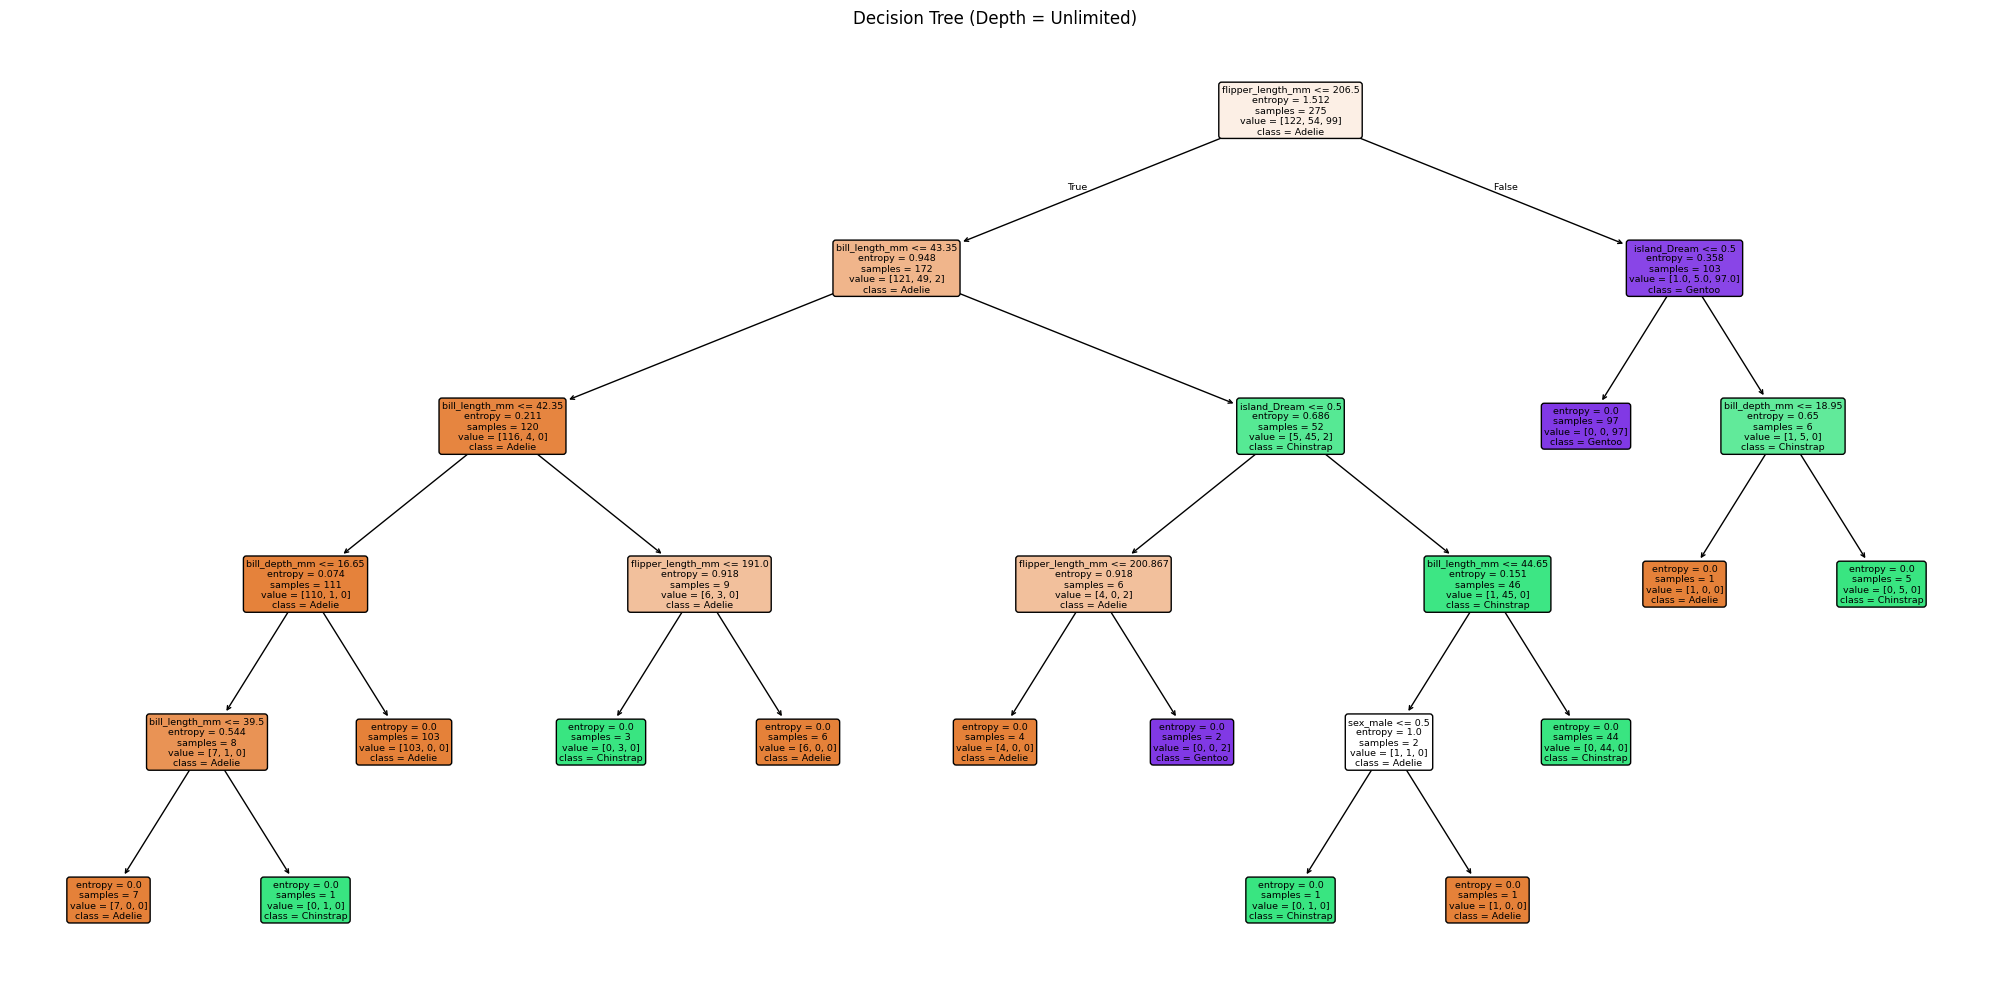

In [11]:
# Visualize the best tree model
# Find the best depth based on our analysis
best_depth_idx = depth_results['accuracy'].argmax()
best_depth = depths[best_depth_idx]

# Train a model with the best depth
best_model = train_decision_tree(X_train, y_train, depth=best_depth)

# Get feature names and class names
feature_names = X.columns.tolist()
class_names = sorted(y.unique().tolist())

print(f"Visualizing decision tree with depth={best_depth}")

# Save to organized subdirectory
best_tree_path = f"../../results/palmer_penguins/decision_tree/best_decision_tree_depth_{best_depth if best_depth is not None else 'unlimited'}.png"
visualize_tree(best_model, feature_names, class_names, output_path=best_tree_path)
print(f"Saved best decision tree to {best_tree_path}")

# Display the tree in the notebook
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title(f"Decision Tree (Depth = {'Unlimited' if best_depth is None else best_depth})")
plt.tight_layout()
plt.show()

## Summary of Results

In [12]:
# Create a summary table of results from different splits
summary_data = {
    'Split Ratio': split_ratios,
    'Training Samples': [X_train.shape[0] for X_train, _, _, _ in splits],
    'Test Samples': [X_test.shape[0] for _, X_test, _, _ in splits],
    'Accuracy': [result['accuracy'] for result in evaluation_results]
}

summary_df = pd.DataFrame(summary_data)

# Save to organized subdirectory
summary_path = "../../results/palmer_penguins/accuracy_tables/summary_results_by_splits.csv"
summary_df.to_csv(summary_path, index=False)
print(f"Saved summary results to {summary_path}")

print("Summary of Results:")
print(summary_df)

Saved summary results to ../../results/palmer_penguins/accuracy_tables/summary_results_by_splits.csv
Summary of Results:
  Split Ratio  Training Samples  Test Samples  Accuracy
0       40-60               137           207  0.951691
1       60-40               206           138  0.978261
2       80-20               275            69  0.985507
3       90-10               309            35  1.000000


## Feature Descriptions:
- bill_length_mm: Length of penguin's bill in millimeters
- bill_depth_mm: Depth of penguin's bill in millimeters
- flipper_length_mm: Length of penguin's flipper in millimeters
- body_mass_g: Body mass in grams
- sex_male: Gender (True=Male, False=Female)
- island_Dream, island_Torgersen: Island location (one-hot encoded)

## Conclusion

In this notebook, we've analyzed the Palmer Penguins dataset using decision trees to predict penguin species based on their physical characteristics. Our analysis included:

1. Data preprocessing to handle missing values and encode categorical features
2. Creating multiple train/test splits with different ratios
3. Visualizing class distributions across splits
4. Training and evaluating decision tree models
5. Analyzing the effect of tree depth on model performance

Key findings:
- The impact of different train/test split ratios on model performance
- The optimal tree depth for balancing model complexity and performance
- Important features for distinguishing between penguin species

These results provide valuable insights into how decision trees can be used for species classification tasks based on physical measurements.

## Organized Output Structure

All analysis results are now systematically organized in dedicated subdirectories under `results/palmer_penguins/` for easy navigation and understanding:

### Directory Structure:
```
results/palmer_penguins/
├── class_distributions/          # Class distribution plots for each split
│   ├── class_distribution_split_1_40_60.png
│   ├── class_distribution_split_2_60_40.png
│   ├── class_distribution_split_3_80_20.png
│   └── class_distribution_split_4_90_10.png
├── confusion_matrices/           # Confusion matrix visualizations
│   ├── confusion_matrix_split_1_40_60.png
│   ├── confusion_matrix_split_2_60_40.png
│   ├── confusion_matrix_split_3_80_20.png
│   └── confusion_matrix_split_4_90_10.png
├── classification_reports/       # Detailed classification reports
│   ├── classification_report_split_1_40_60.txt
│   ├── classification_report_split_2_60_40.txt
│   ├── classification_report_split_3_80_20.txt
│   └── classification_report_split_4_90_10.txt
├── accuracy_tables/              # Accuracy analysis and summary tables
│   ├── accuracy_by_depth.csv
│   ├── accuracy_vs_depth.png
│   ├── depth_analysis_results.csv
│   └── summary_results_by_splits.csv
└── decision_tree/                # Decision tree visualizations and summaries
    ├── tree_split_1_40_60.png    # Trees for different splits
    ├── tree_split_2_60_40.png
    ├── tree_split_3_80_20.png
    ├── tree_split_4_90_10.png
    ├── tree_depth_2.png          # Trees for different depths
    ├── tree_depth_3.png
    ├── tree_depth_4.png
    ├── tree_depth_5.png
    ├── tree_depth_6.png
    ├── tree_depth_7.png
    ├── tree_unlimited.png
    ├── best_decision_tree_depth_[X].png
    ├── summary_by_splits.csv      # Summary statistics
    └── summary_by_depths.csv
```

### Benefits of This Organization:
1. **Clear Categorization**: Each type of output is in its own dedicated folder
2. **Easy Navigation**: Users can quickly find specific types of results
3. **Consistent Naming**: File names include clear identifiers for splits and parameters
4. **Scalability**: Structure can easily accommodate additional analyses
5. **Professional Presentation**: Results are organized like a research project

## 📁 Organized File Structure

Tất cả các kết quả phân tích được tổ chức vào các thư mục con riêng biệt trong `results/palmer_penguins/`:

### 📊 **results/palmer_penguins/** - Thư mục chính chứa tất cả kết quả
```
results/palmer_penguins/
├── 📈 accuracy_tables/           # Bảng độ chính xác và kết quả phân tích
│   ├── summary_results_by_splits.csv    # Tổng kết kết quả theo tỉ lệ chia
│   ├── depth_analysis_results.csv       # Kết quả phân tích độ sâu cây
│   └── accuracy_vs_depth.png           # Biểu đồ độ chính xác theo độ sâu
│
├── 📋 classification_reports/     # Báo cáo phân loại chi tiết
│   ├── classification_report_split_1_40_60.txt
│   ├── classification_report_split_2_60_40.txt
│   ├── classification_report_split_3_80_20.txt
│   └── classification_report_split_4_90_10.txt
│
├── 🔄 confusion_matrices/        # Ma trận nhầm lẫn
│   ├── confusion_matrix_split_1_40_60.png
│   ├── confusion_matrix_split_2_60_40.png
│   ├── confusion_matrix_split_3_80_20.png
│   └── confusion_matrix_split_4_90_10.png
│
├── 📊 class_distributions/       # Phân bố lớp dữ liệu
│   ├── class_distribution_split_1_40_60.png
│   ├── class_distribution_split_2_60_40.png
│   ├── class_distribution_split_3_80_20.png
│   └── class_distribution_split_4_90_10.png
│
└── 🌳 decision_tree/            # Cây quyết định
    ├── tree_split_1_40_60.png          # Cây theo tỉ lệ chia dữ liệu
    ├── tree_split_2_60_40.png
    ├── tree_split_3_80_20.png
    ├── tree_split_4_90_10.png
    ├── tree_depth_2.png               # Cây theo độ sâu
    ├── tree_depth_3.png
    ├── tree_depth_4.png
    ├── tree_depth_5.png
    ├── tree_depth_6.png
    ├── tree_depth_7.png
    ├── tree_unlimited.png
    ├── best_decision_tree_depth_X.png  # Cây tốt nhất
    ├── summary_by_splits.csv           # Tổng kết theo chia dữ liệu
    └── summary_by_depths.csv           # Tổng kết theo độ sâu
```

### 📊 **visualizations/palmer_penguins/** - Thư mục trực quan hóa bổ sung
```
visualizations/palmer_penguins/
├── class_distributions/          # Phân bố lớp (backup)
├── confusion_matrices/           # Ma trận nhầm lẫn (backup)
├── accuracy_plots/               # Biểu đồ độ chính xác
└── decision_tree/                # Trực quan hóa cây quyết định
```

### 🎯 **Lợi ích của việc tổ chức này:**
1. **Dễ tìm kiếm**: Mỗi loại kết quả có thư mục riêng
2. **Dễ quản lý**: Tránh lẫn lộn các file kết quả
3. **Có tổ chức**: Dễ dàng cho việc thuyết trình và báo cáo
4. **Mở rộng**: Dễ dàng thêm các phân tích mới
5. **Backup**: Có cả results và visualizations để đảm bảo an toàn dữ liệu

# Detailed Decision Tree Visualization

## Objective:
Create and visualize decision trees for different train/test splits and depth configurations to analyze how data distribution and tree complexity affect model structure and performance.

### Part A: Decision Trees for Each Subset (40/60, 60/40, 80/20, 90/10)
Visualize decision trees trained on different train/test split ratios to understand how training data size affects tree structure.

### Part B: Decision Trees for Different Depths (None, 2, 3, 4, 5, 6, 7)
Visualize decision trees with different maximum depths to understand the effect of tree complexity on model structure.

PART A: DECISION TREES FOR DIFFERENT TRAIN/TEST SPLITS

--- Creating Decision Tree for Split 1: 40-60 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_split_1_40-60.png


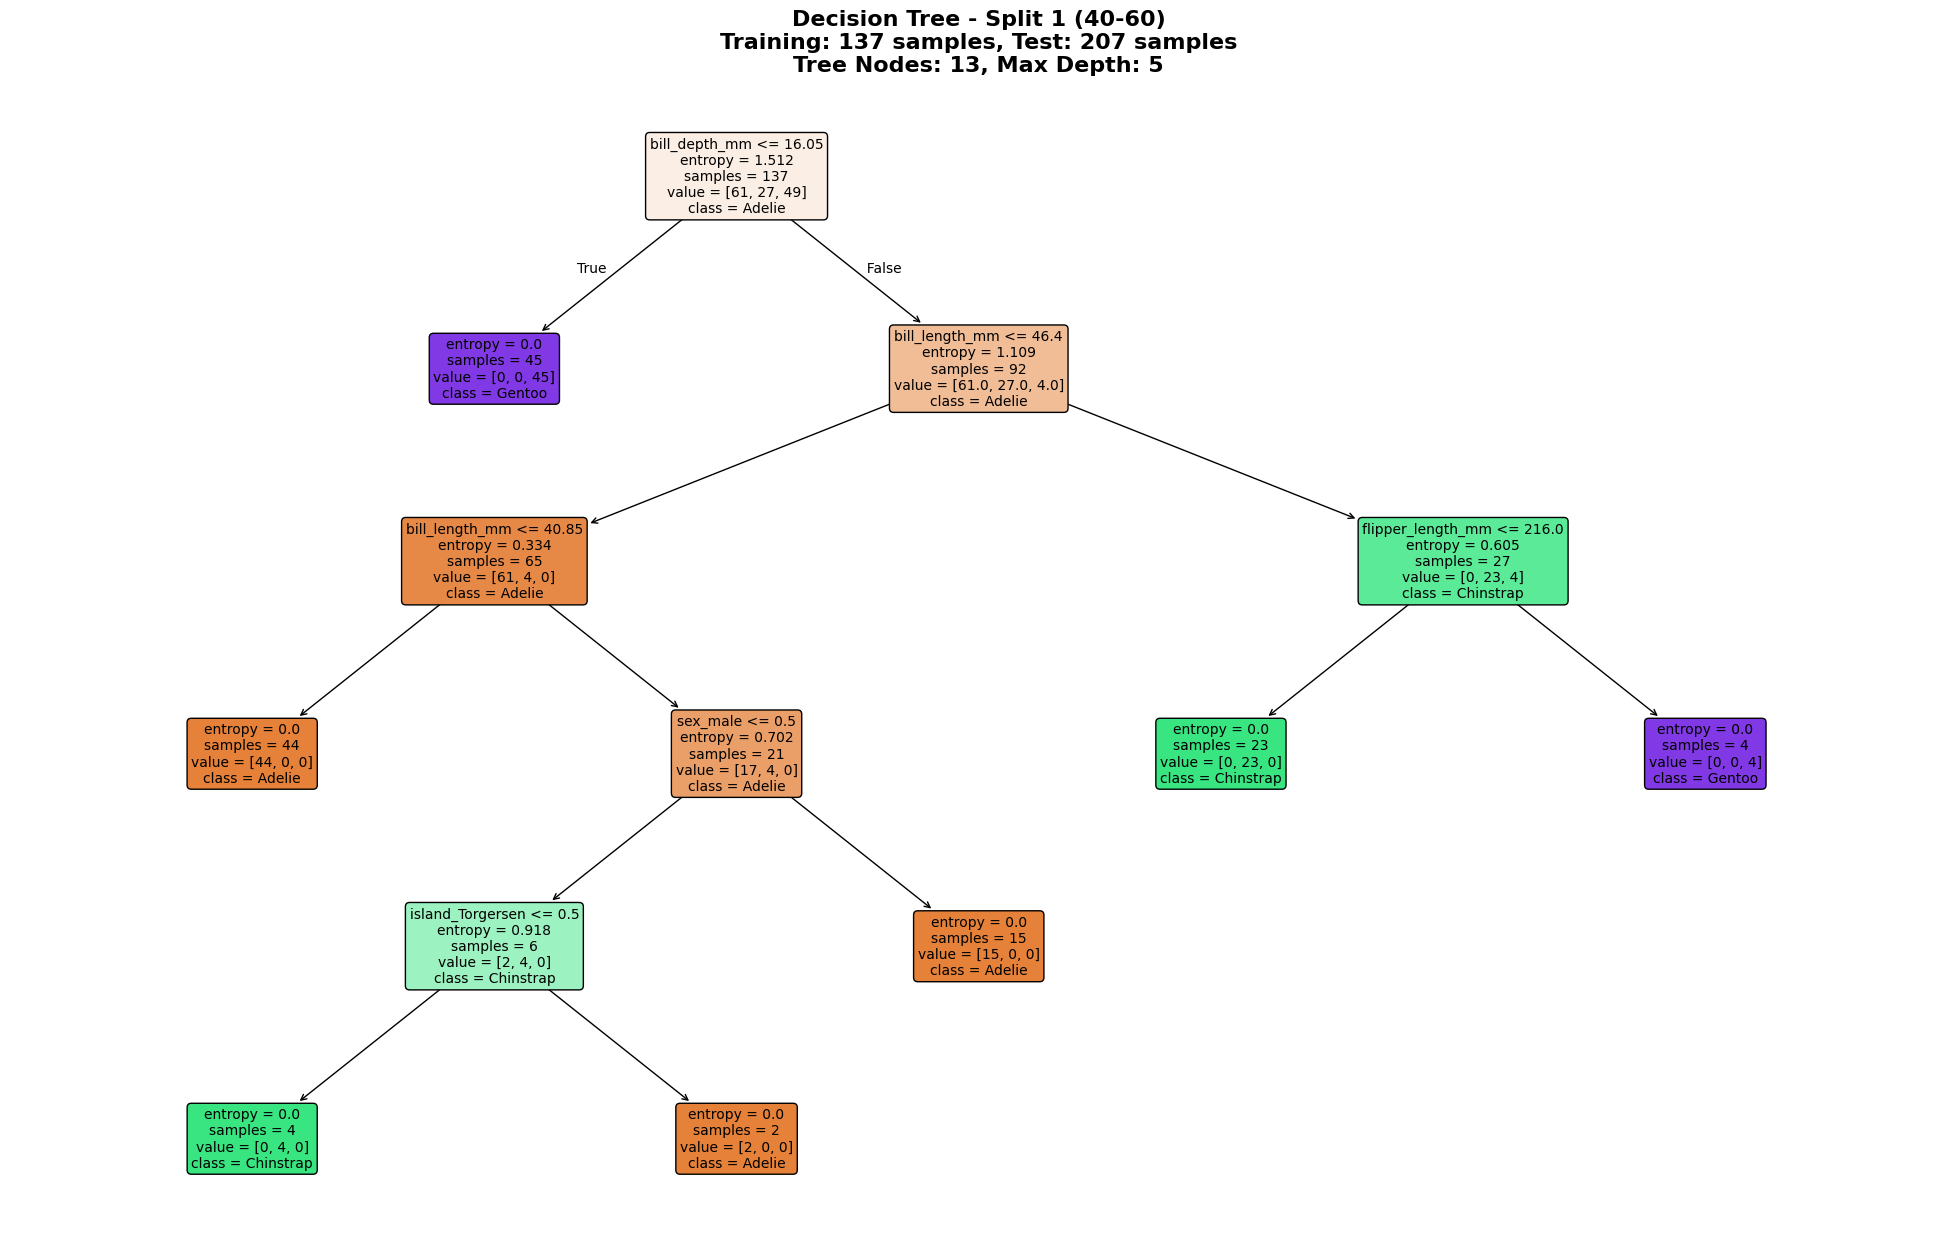

Tree Statistics:
  - Nodes: 13
  - Max Depth: 5
  - Leaves: 7
  - Test Accuracy: 0.9517

--- Creating Decision Tree for Split 2: 60-40 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_split_2_60-40.png


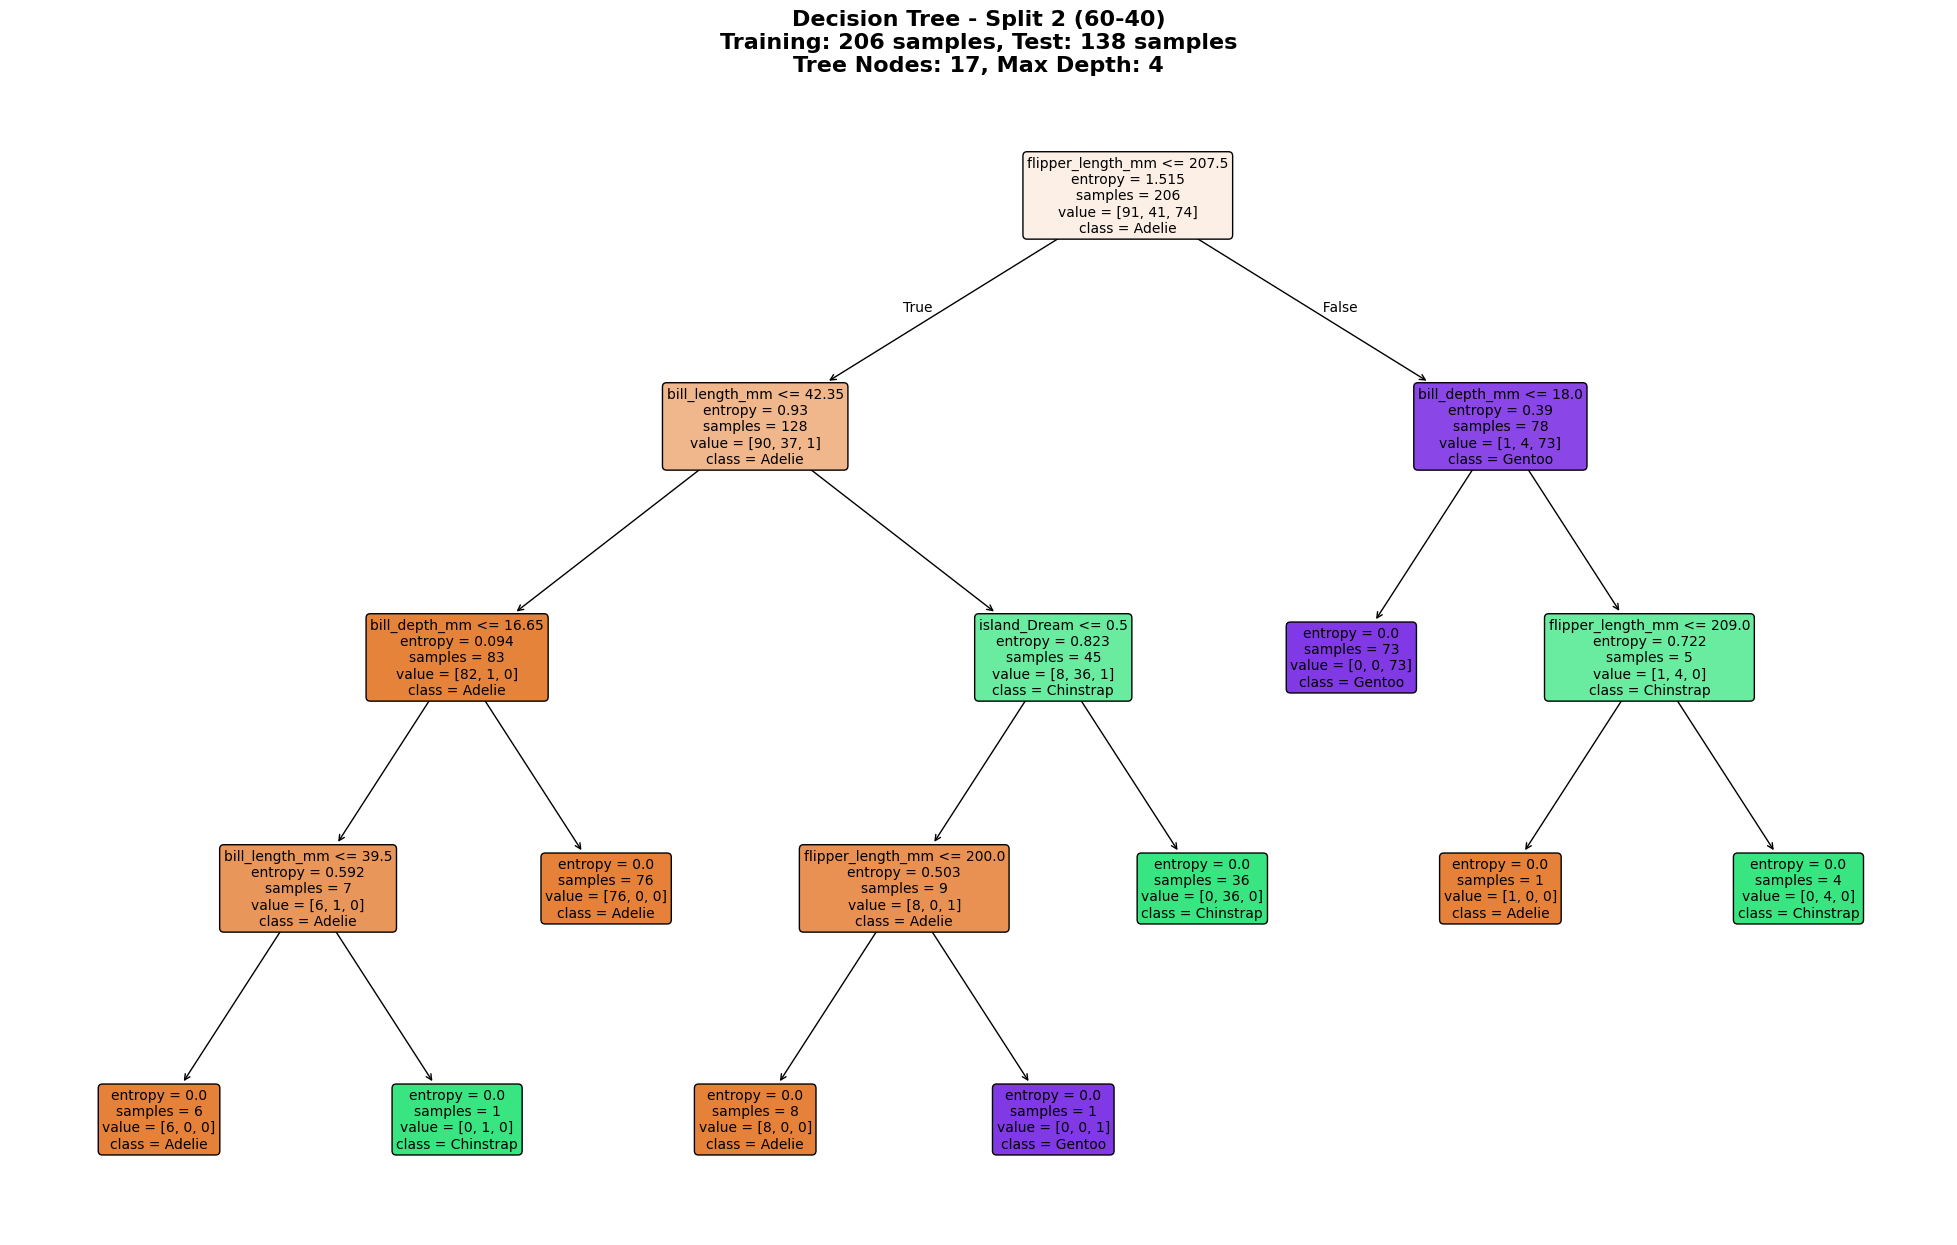

Tree Statistics:
  - Nodes: 17
  - Max Depth: 4
  - Leaves: 9
  - Test Accuracy: 0.9783

--- Creating Decision Tree for Split 3: 80-20 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_split_3_80-20.png


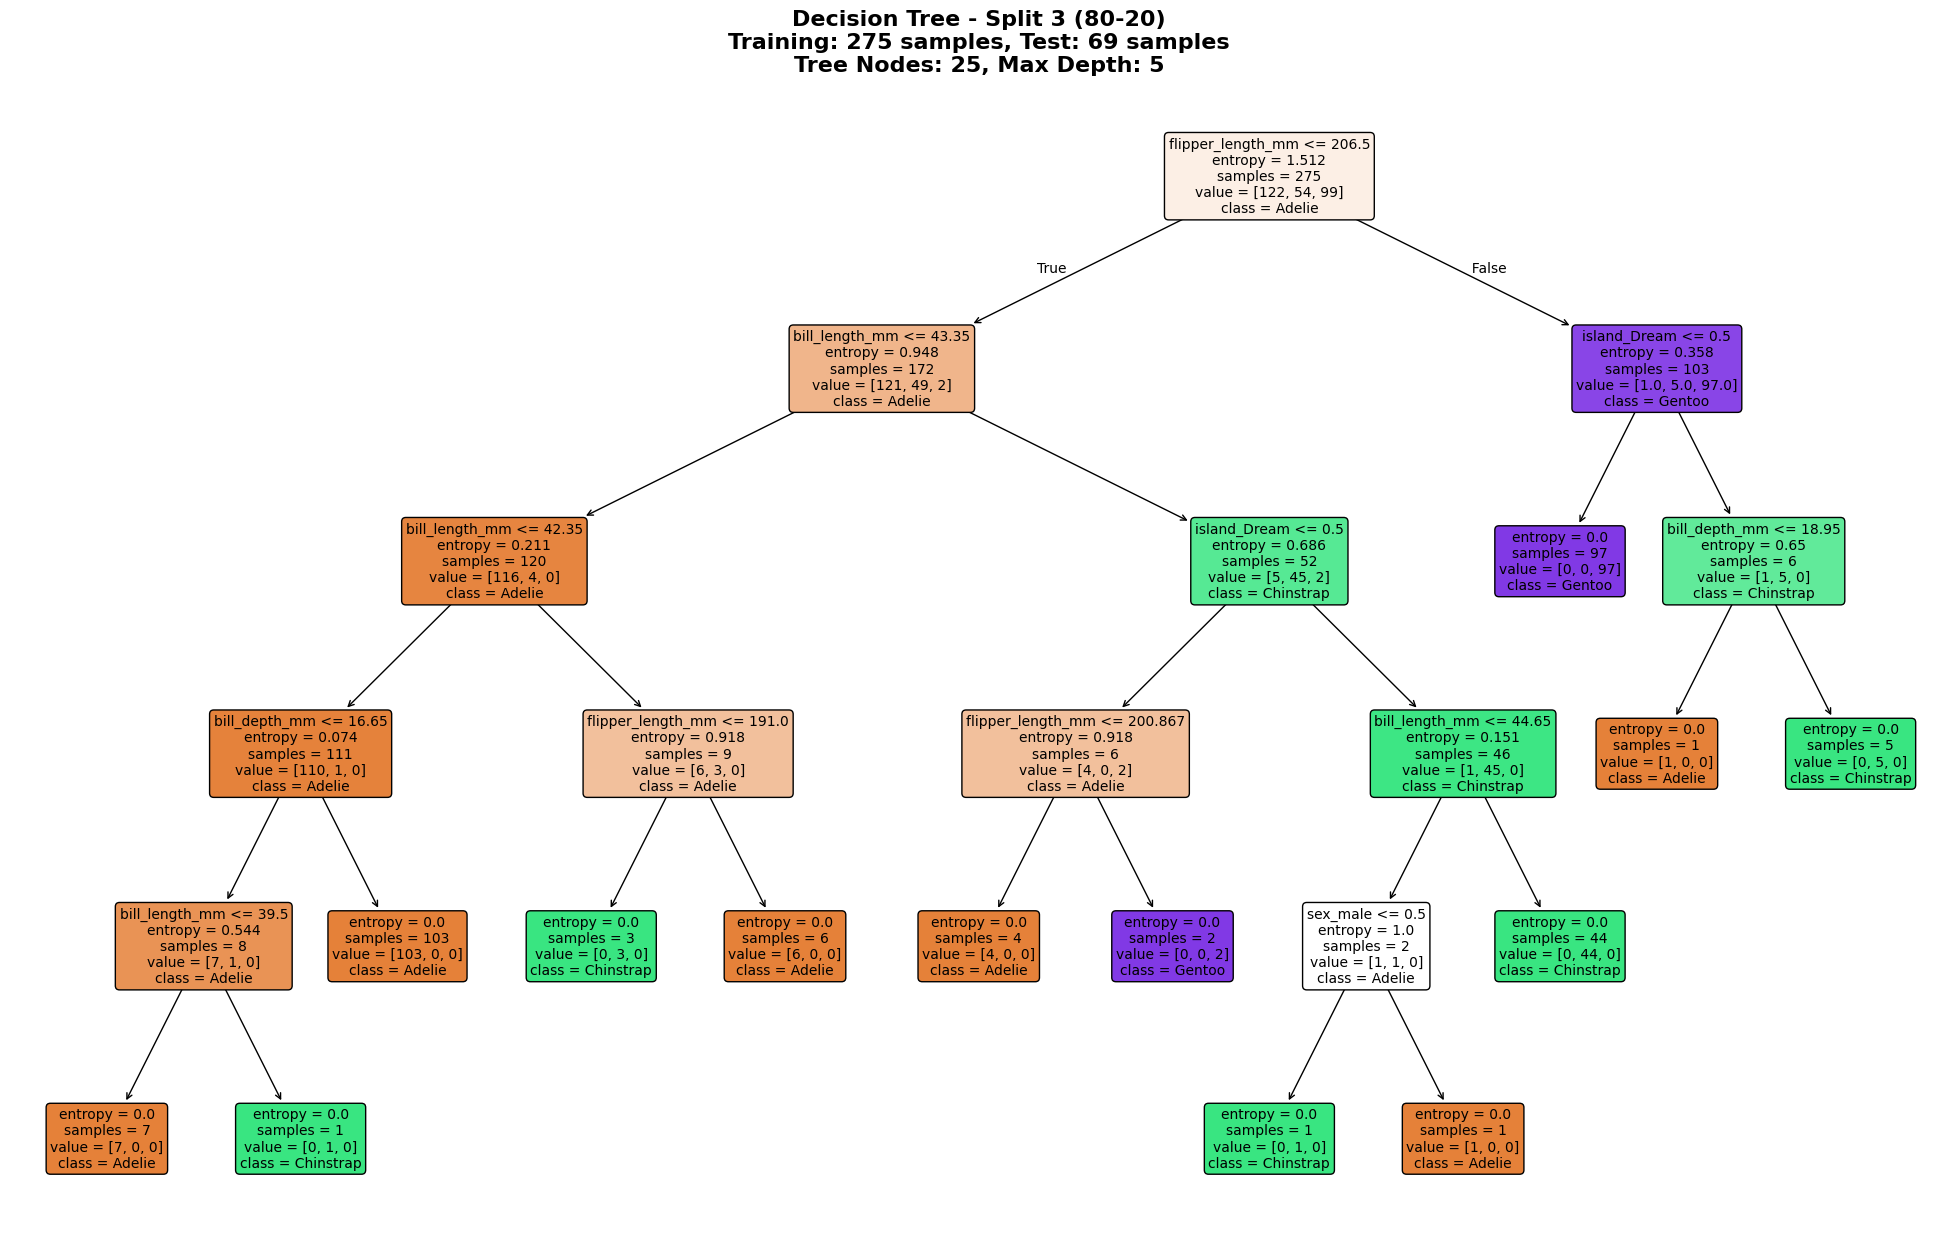

Tree Statistics:
  - Nodes: 25
  - Max Depth: 5
  - Leaves: 13
  - Test Accuracy: 0.9855

--- Creating Decision Tree for Split 4: 90-10 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_split_4_90-10.png


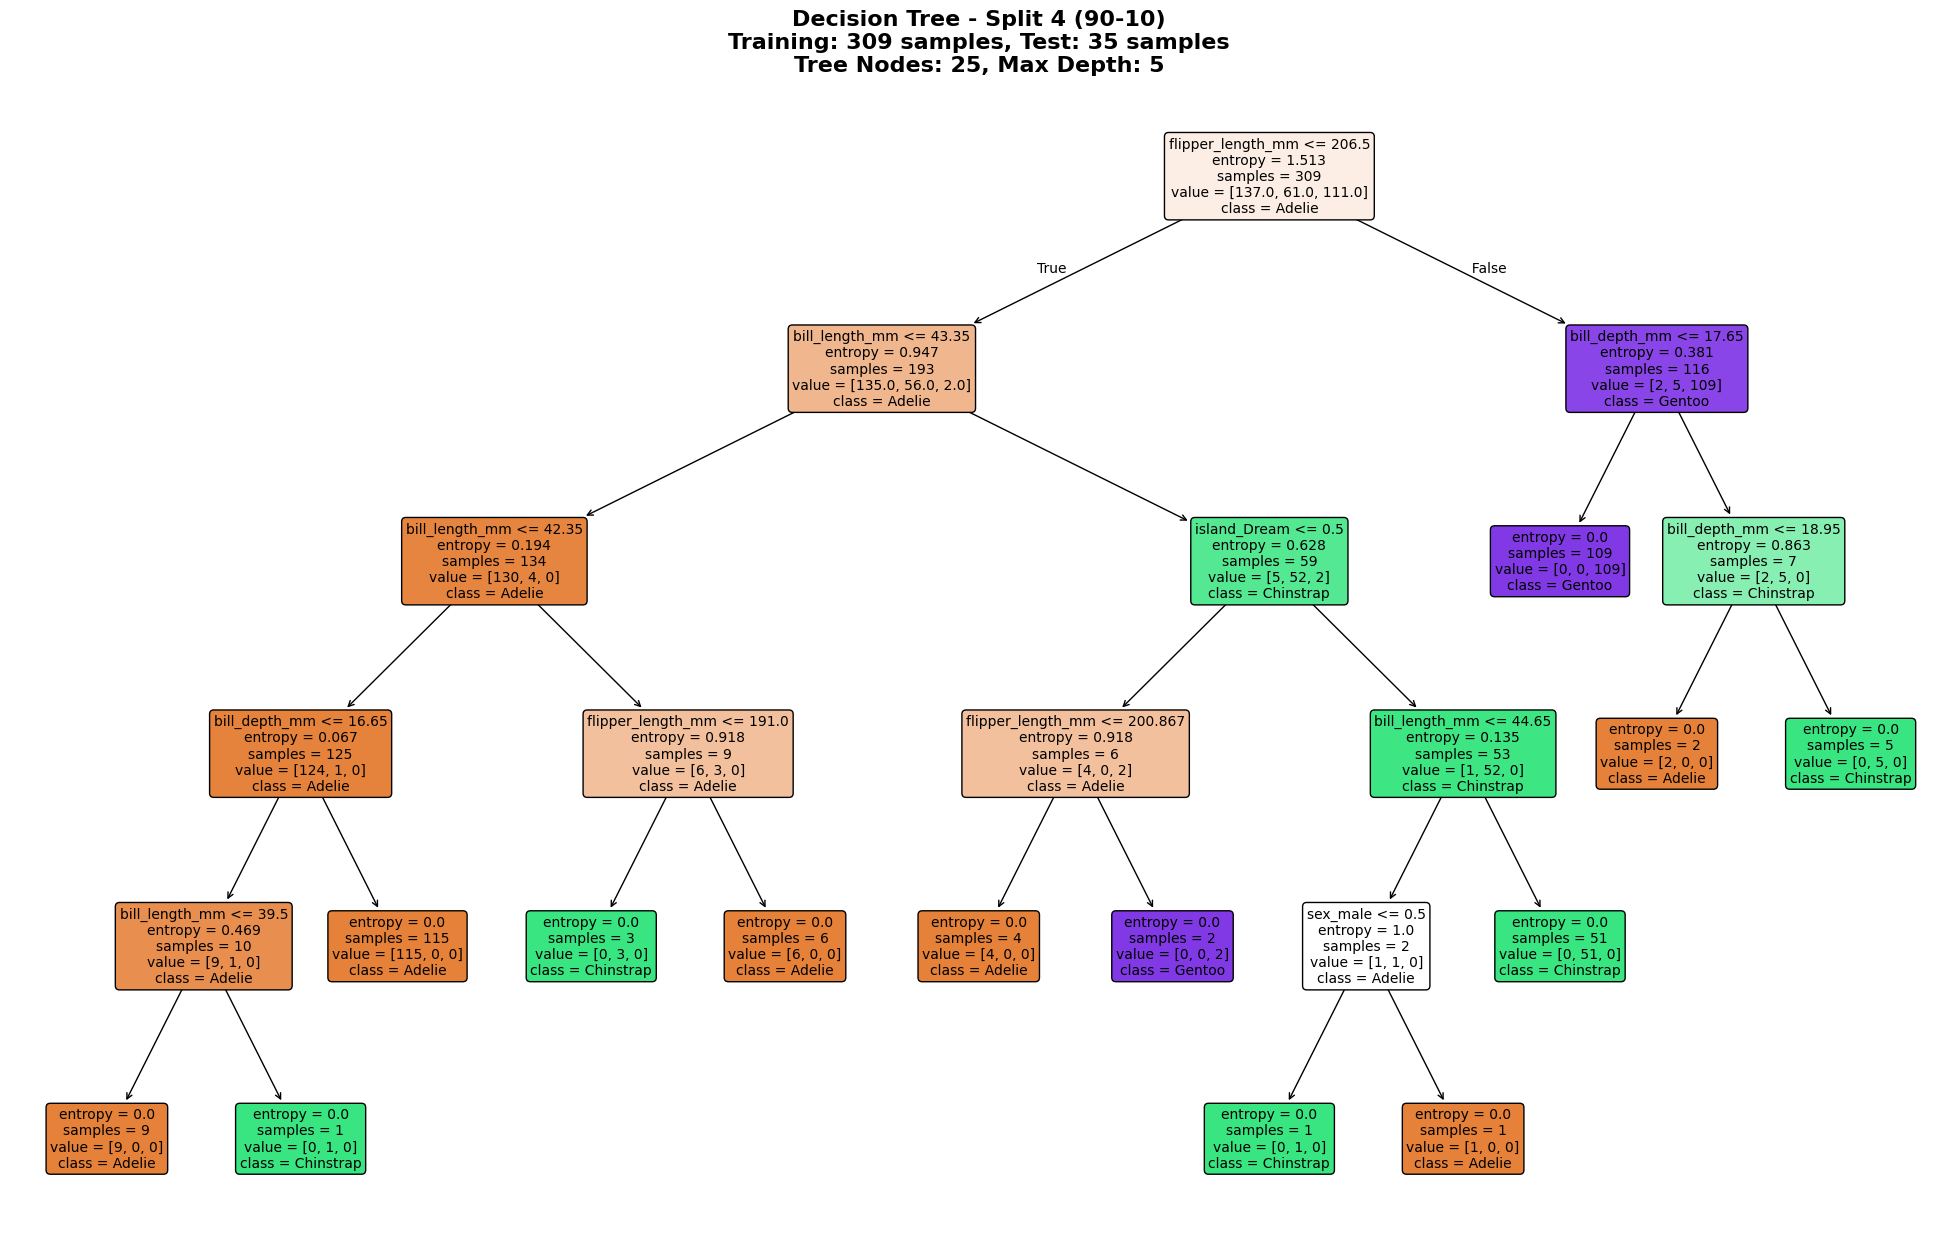

Tree Statistics:
  - Nodes: 25
  - Max Depth: 5
  - Leaves: 13
  - Test Accuracy: 1.0000

Completed visualization of decision trees for 4 different splits!


In [13]:
# Part A: Create Decision Trees for Each Subset (40/60, 60/40, 80/20, 90/10)
print("="*80)
print("PART A: DECISION TREES FOR DIFFERENT TRAIN/TEST SPLITS")
print("="*80)

# Create directory for decision tree visualizations
os.makedirs("../../results/palmer_penguins/decision_tree", exist_ok=True)

# Train and visualize decision tree for each split
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"\n--- Creating Decision Tree for Split {i+1}: {split_ratios[i]} ---")
    
    # Train decision tree
    model = train_decision_tree(X_train, y_train)
    
    # Get feature names and class names
    feature_names = X.columns.tolist()
    class_names = sorted(y.unique().tolist())
    
    # Create tree visualization
    plt.figure(figsize=(25, 15))
    plot_tree(model, 
              feature_names=feature_names, 
              class_names=class_names, 
              filled=True, 
              rounded=True,
              fontsize=10)
    
    plt.title(f"Decision Tree - Split {i+1} ({split_ratios[i]})\n"
              f"Training: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples\n"
              f"Tree Nodes: {model.tree_.node_count}, Max Depth: {model.tree_.max_depth}",
              fontsize=16, fontweight='bold')
    
    # Save the tree
    tree_path = f"../../results/palmer_penguins/decision_tree/tree_split_{i+1}_{split_ratios[i].replace('/', '_')}.png"
    plt.savefig(tree_path, dpi=300, bbox_inches='tight')
    print(f"Saved decision tree to: {tree_path}")
    
    plt.show()
    
    # Print tree statistics
    print(f"Tree Statistics:")
    print(f"  - Nodes: {model.tree_.node_count}")
    print(f"  - Max Depth: {model.tree_.max_depth}")
    print(f"  - Leaves: {model.tree_.n_leaves}")
    
    # Make predictions and show accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"  - Test Accuracy: {accuracy:.4f}")

print(f"\nCompleted visualization of decision trees for {len(splits)} different splits!")


PART B: DECISION TREES FOR DIFFERENT DEPTHS
Using Split 3 (80/20): 275 training, 69 test samples

--- Creating Decision Tree with Max Depth: Unlimited ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_unlimited.png


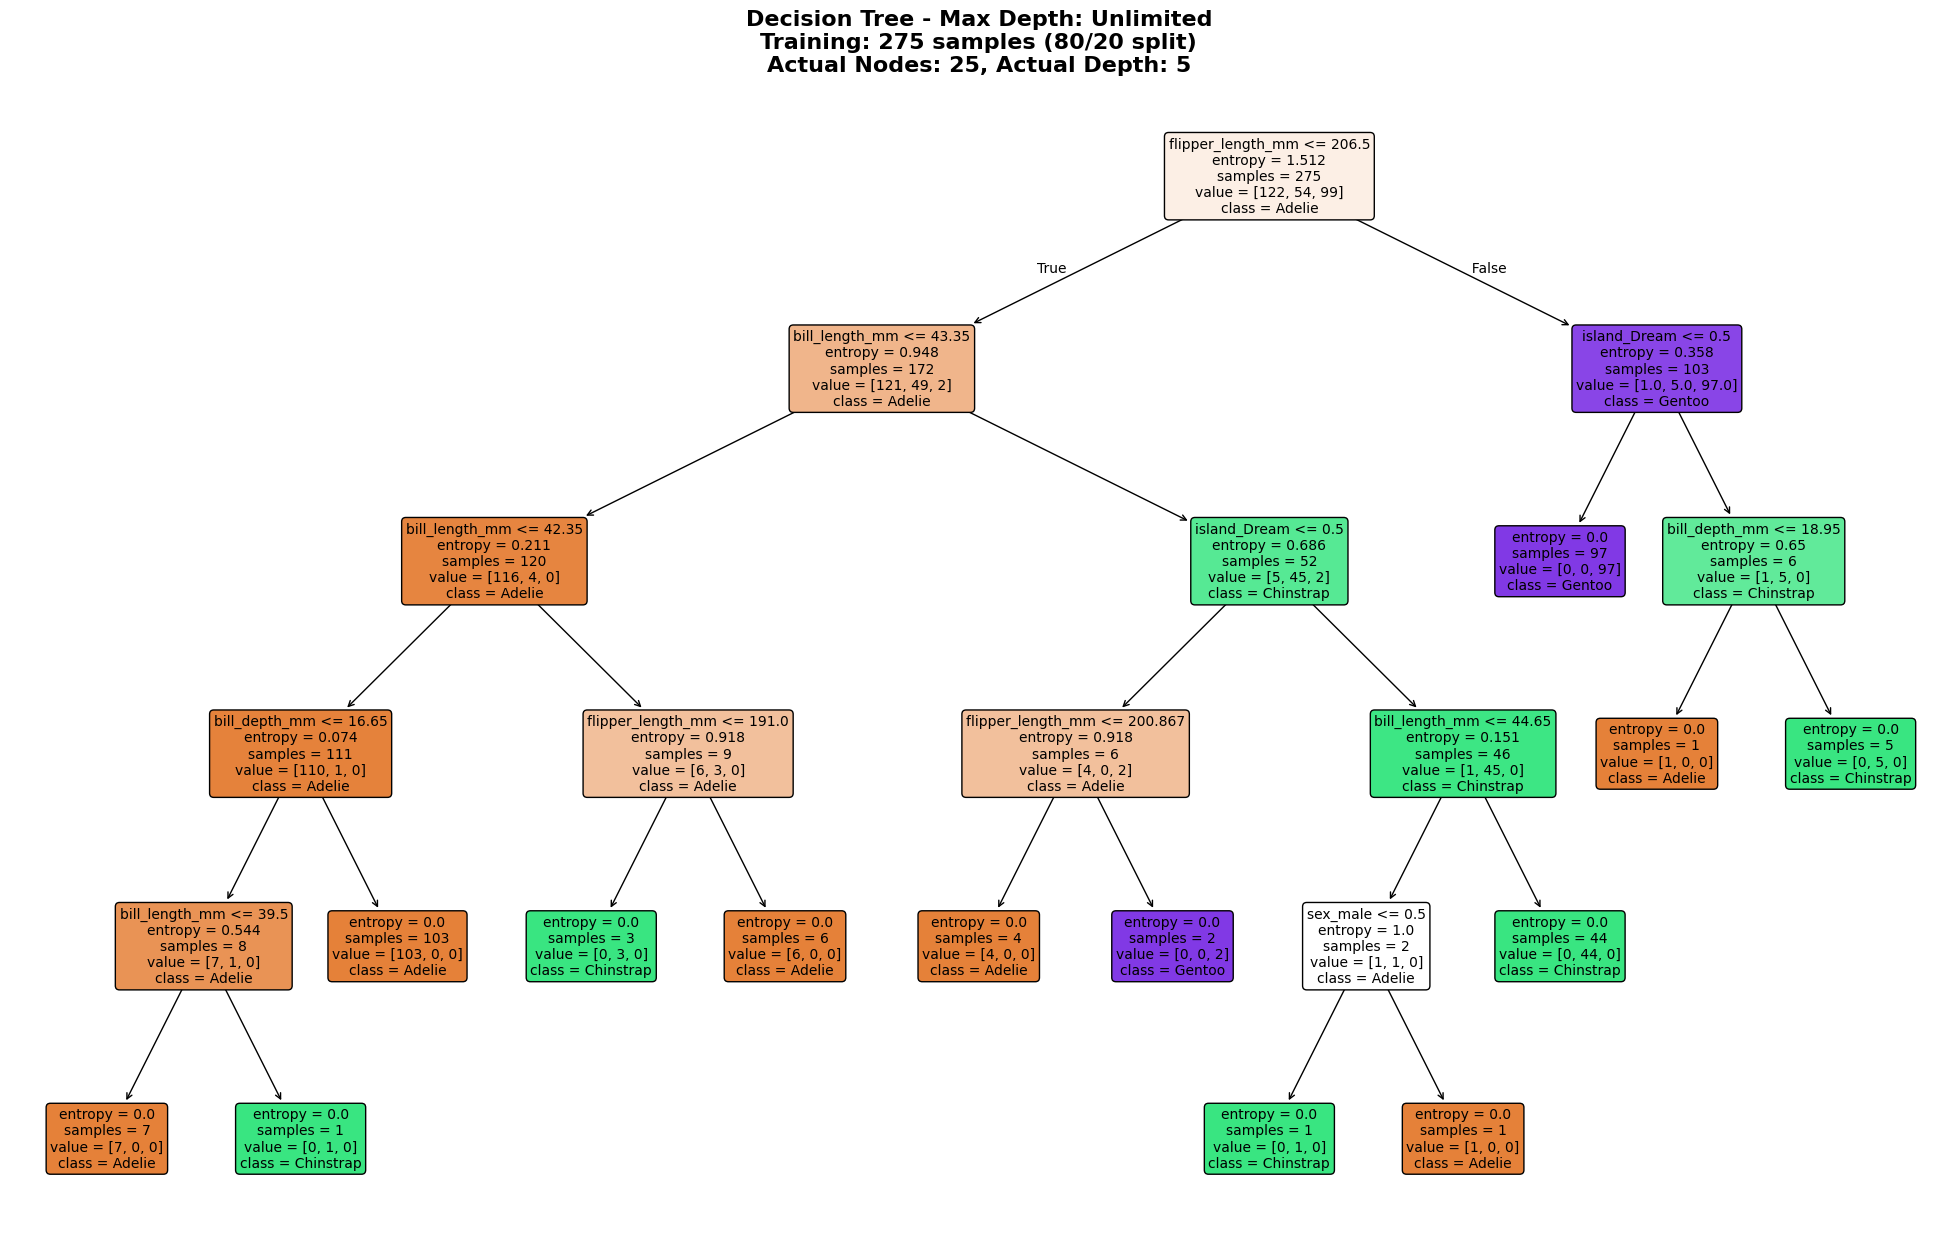

Tree Statistics:
  - Max Depth Setting: Unlimited
  - Actual Depth: 5
  - Nodes: 25
  - Leaves: 13
  - Test Accuracy: 0.9855

--- Creating Decision Tree with Max Depth: 2 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_depth_2.png


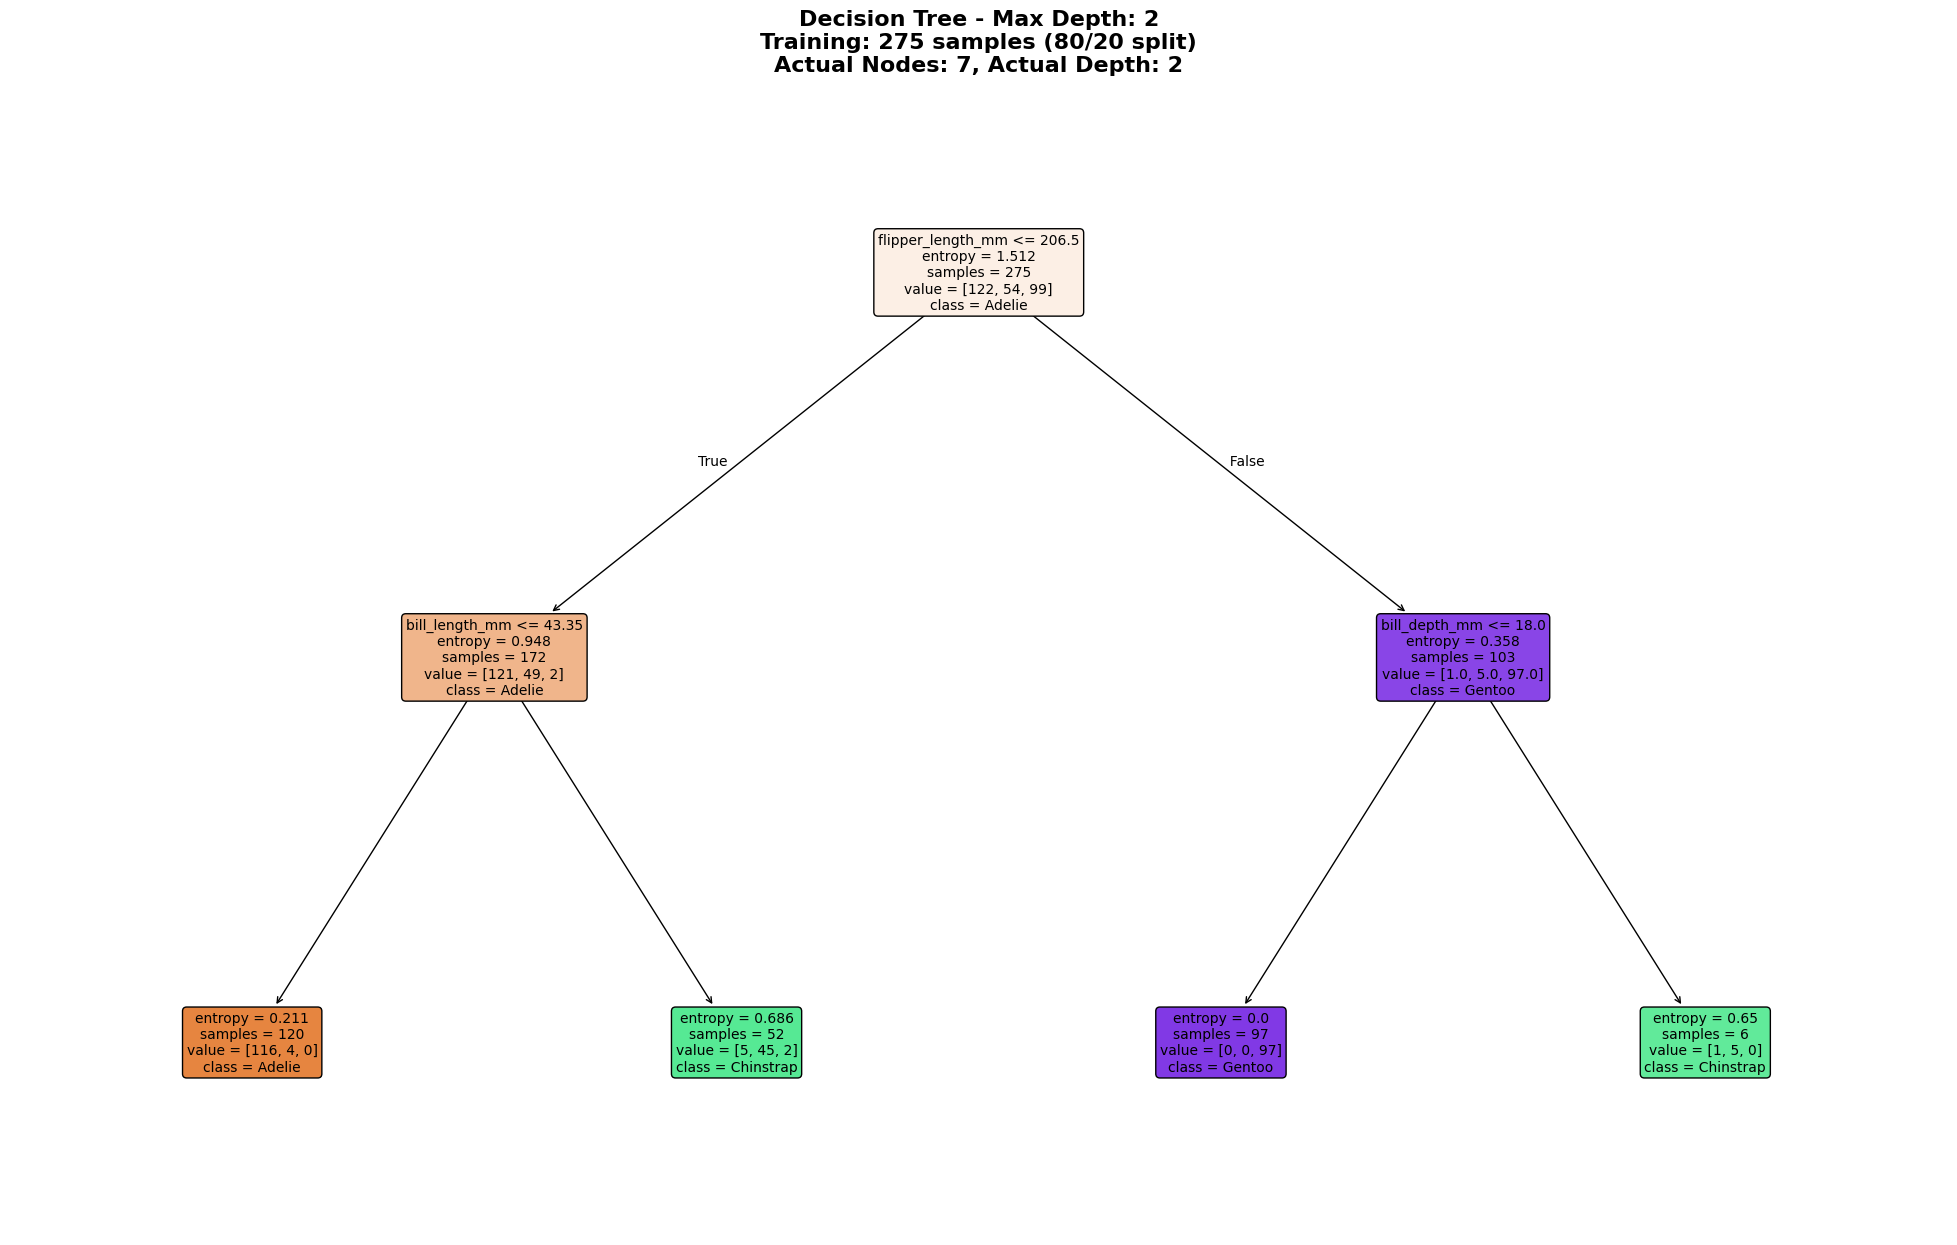

Tree Statistics:
  - Max Depth Setting: 2
  - Actual Depth: 2
  - Nodes: 7
  - Leaves: 4
  - Test Accuracy: 0.9710

--- Creating Decision Tree with Max Depth: 3 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_depth_3.png


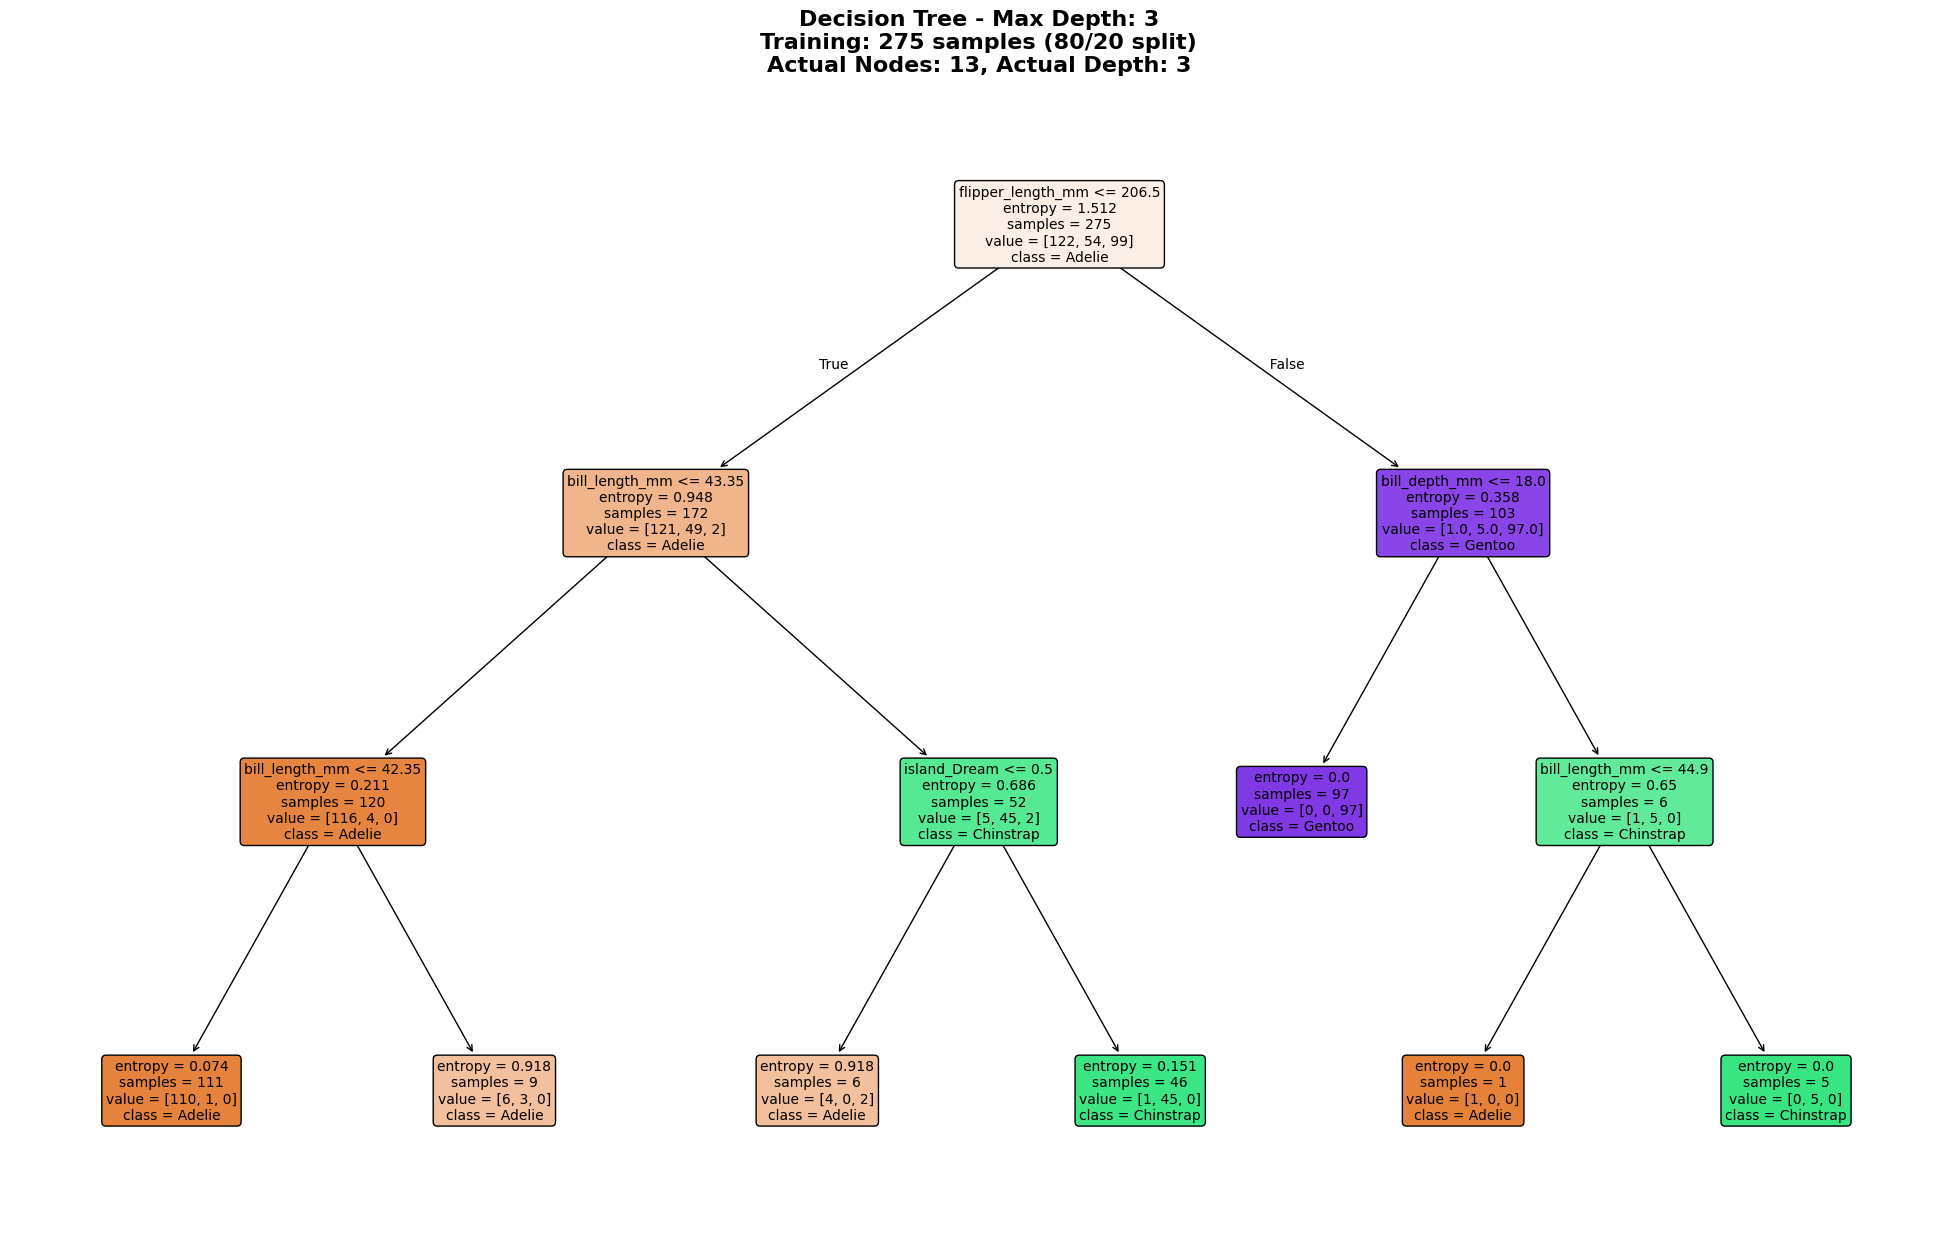

Tree Statistics:
  - Max Depth Setting: 3
  - Actual Depth: 3
  - Nodes: 13
  - Leaves: 7
  - Test Accuracy: 0.9710

--- Creating Decision Tree with Max Depth: 4 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_depth_4.png


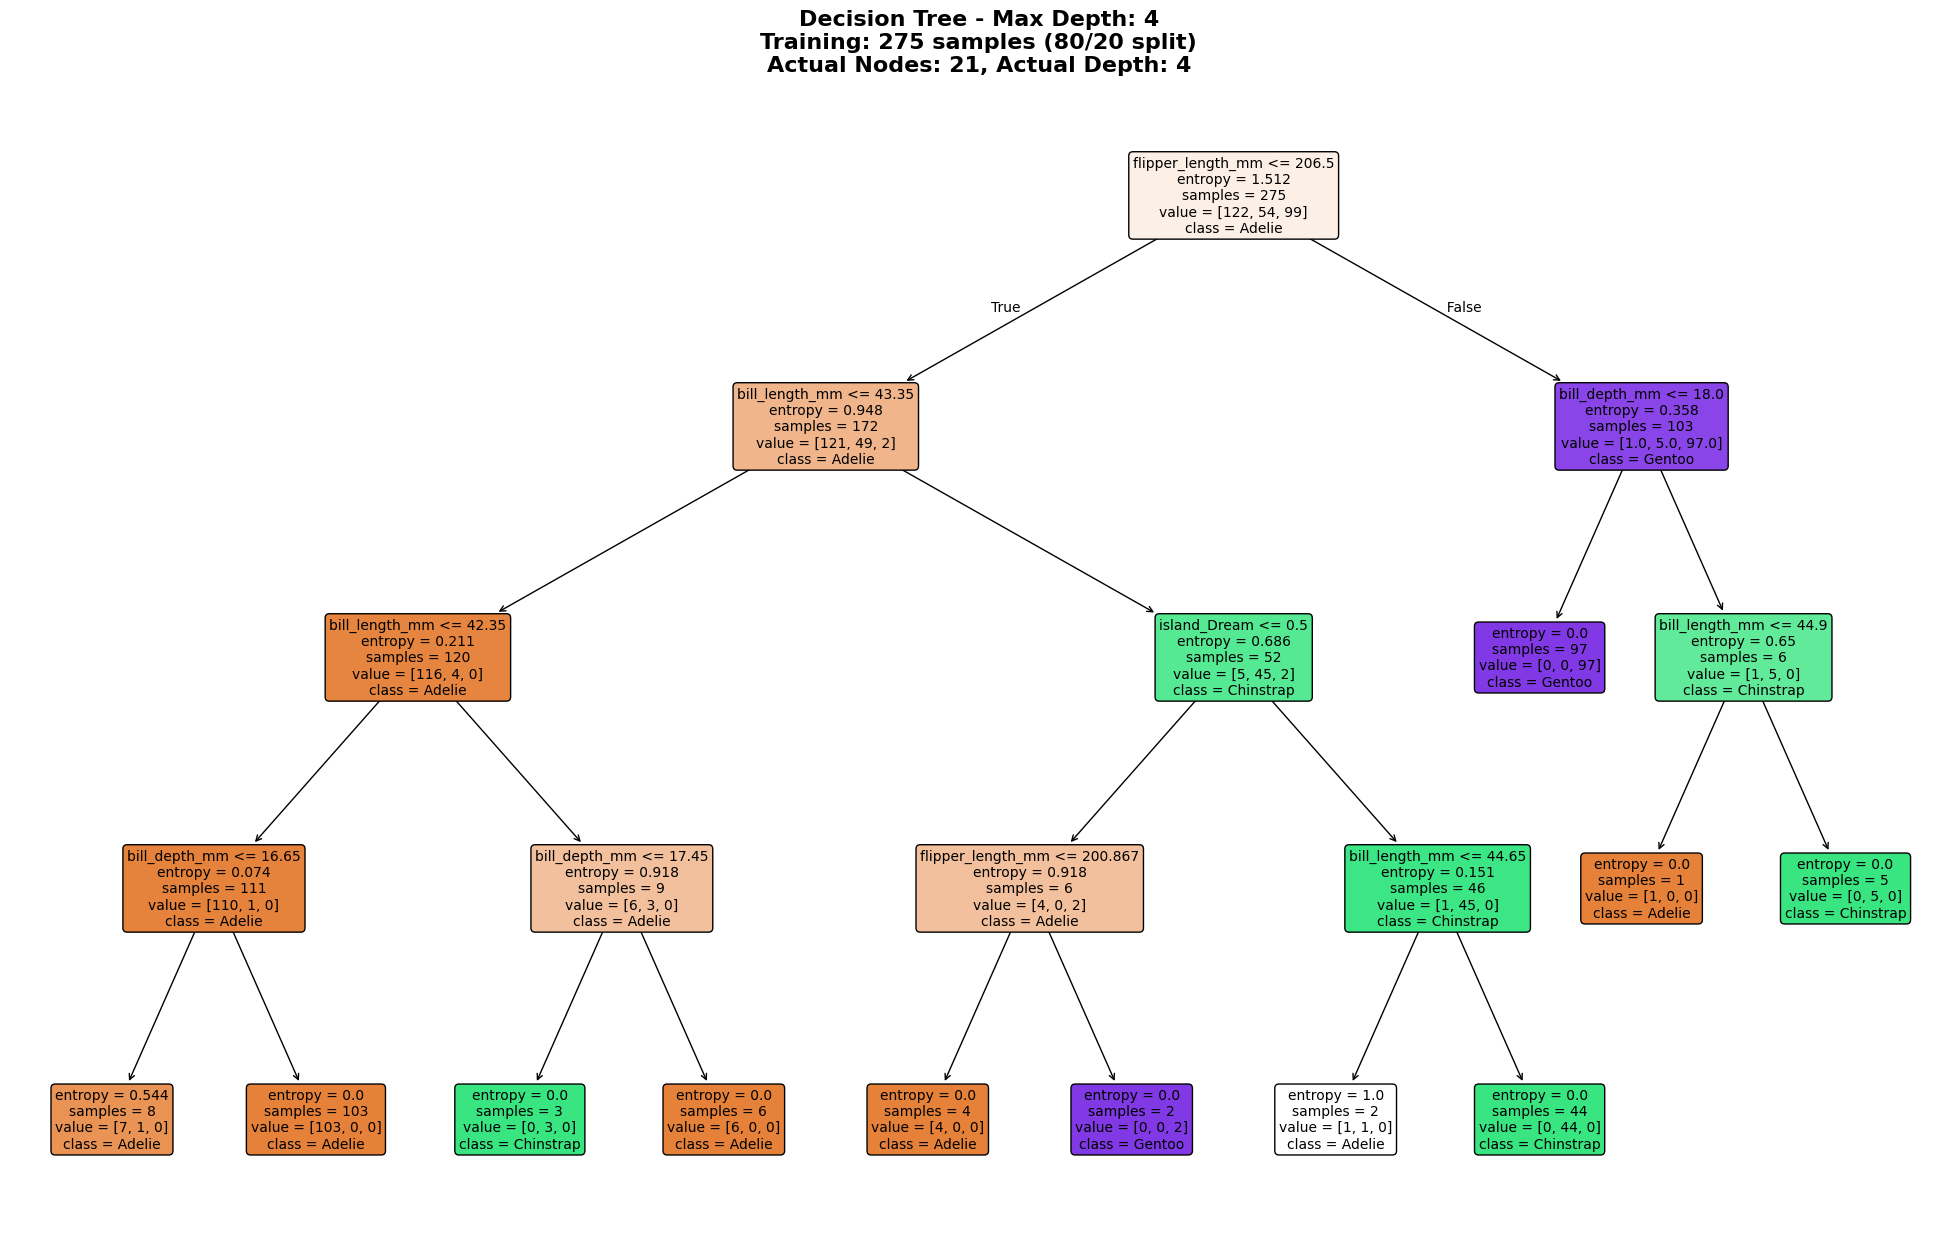

Tree Statistics:
  - Max Depth Setting: 4
  - Actual Depth: 4
  - Nodes: 21
  - Leaves: 11
  - Test Accuracy: 0.9855

--- Creating Decision Tree with Max Depth: 5 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_depth_5.png


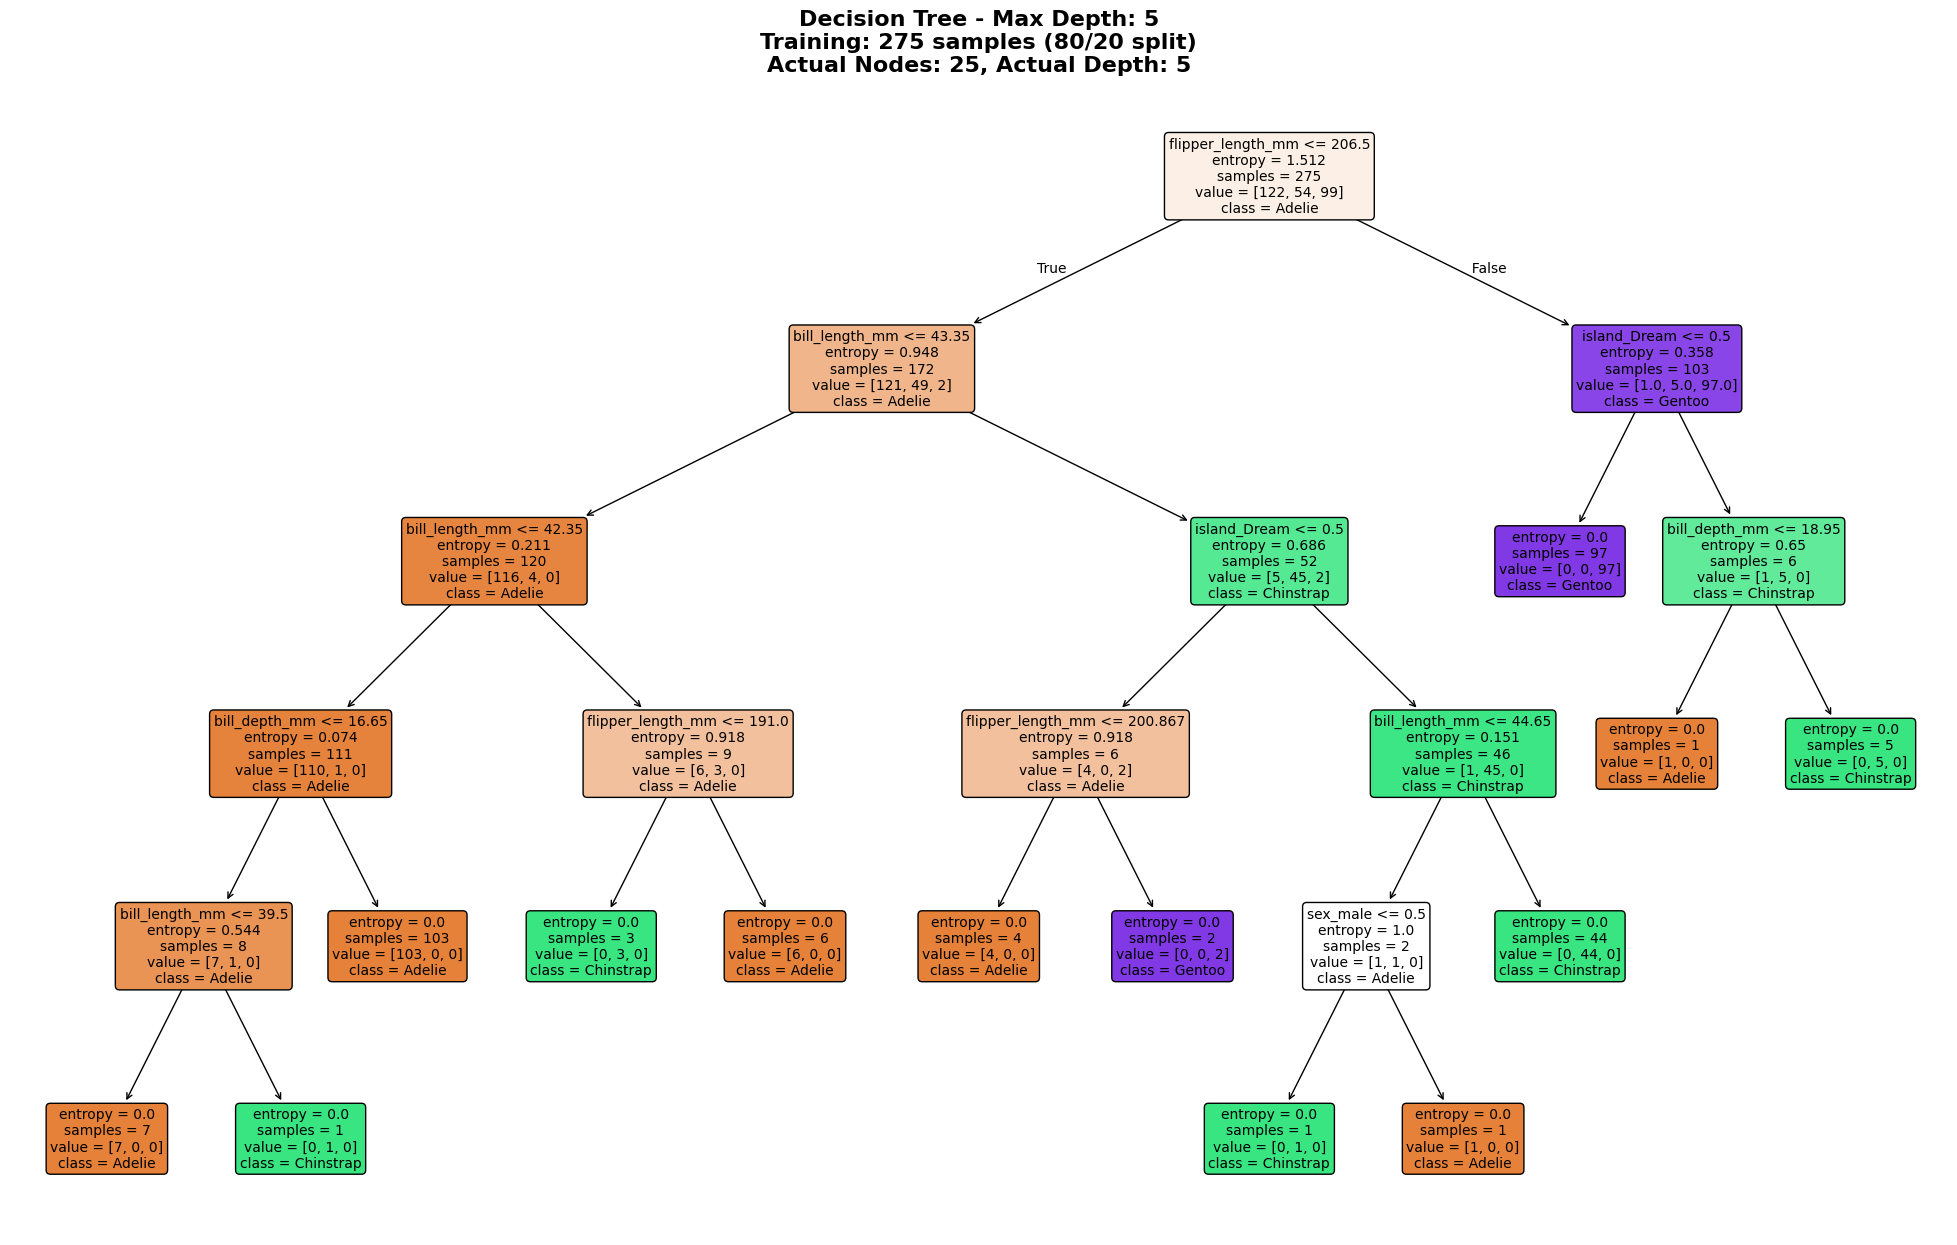

Tree Statistics:
  - Max Depth Setting: 5
  - Actual Depth: 5
  - Nodes: 25
  - Leaves: 13
  - Test Accuracy: 0.9855

--- Creating Decision Tree with Max Depth: 6 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_depth_6.png


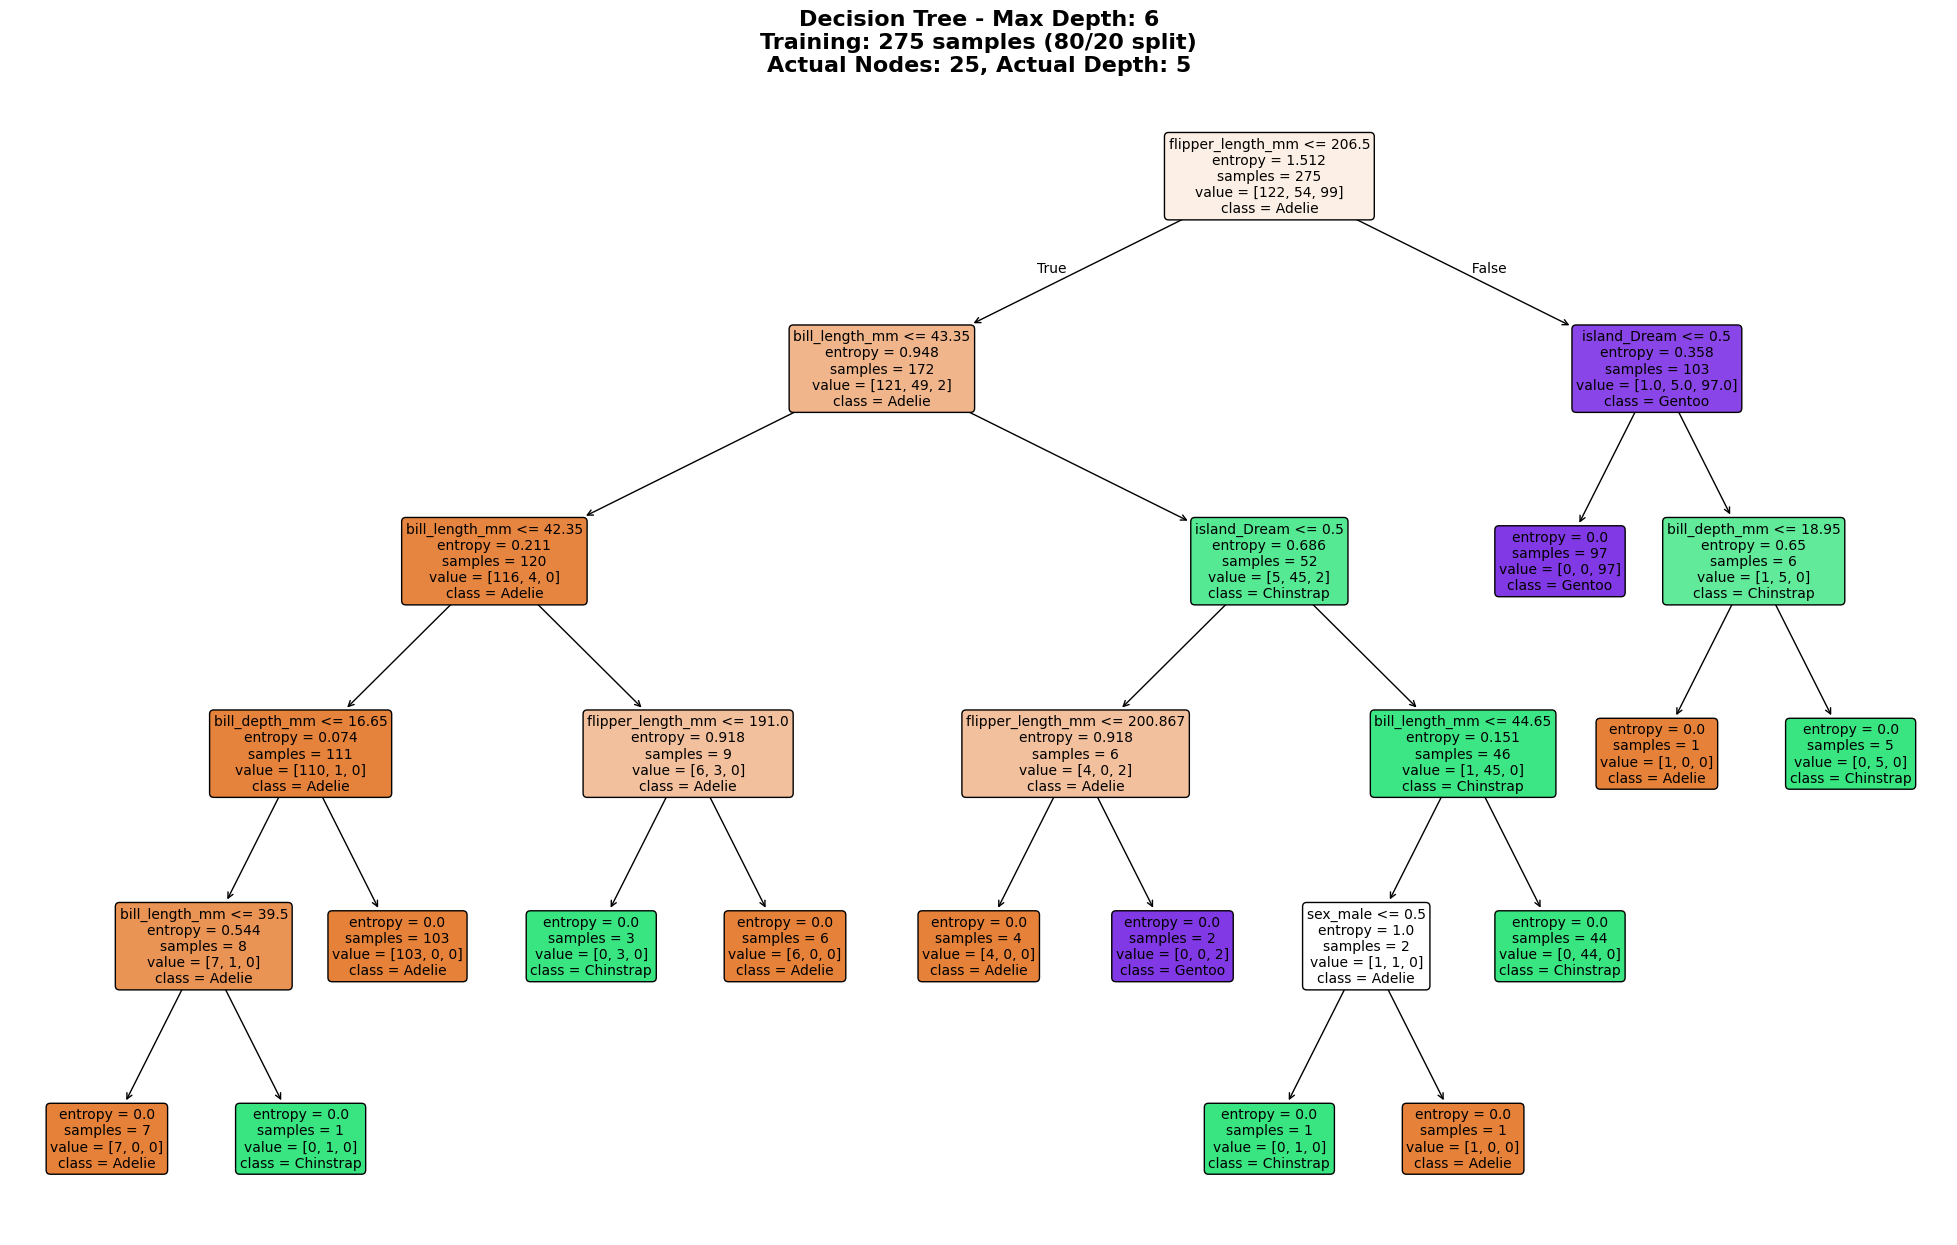

Tree Statistics:
  - Max Depth Setting: 6
  - Actual Depth: 5
  - Nodes: 25
  - Leaves: 13
  - Test Accuracy: 0.9855

--- Creating Decision Tree with Max Depth: 7 ---
Saved decision tree to: ../../results/palmer_penguins/decision_tree/tree_depth_7.png


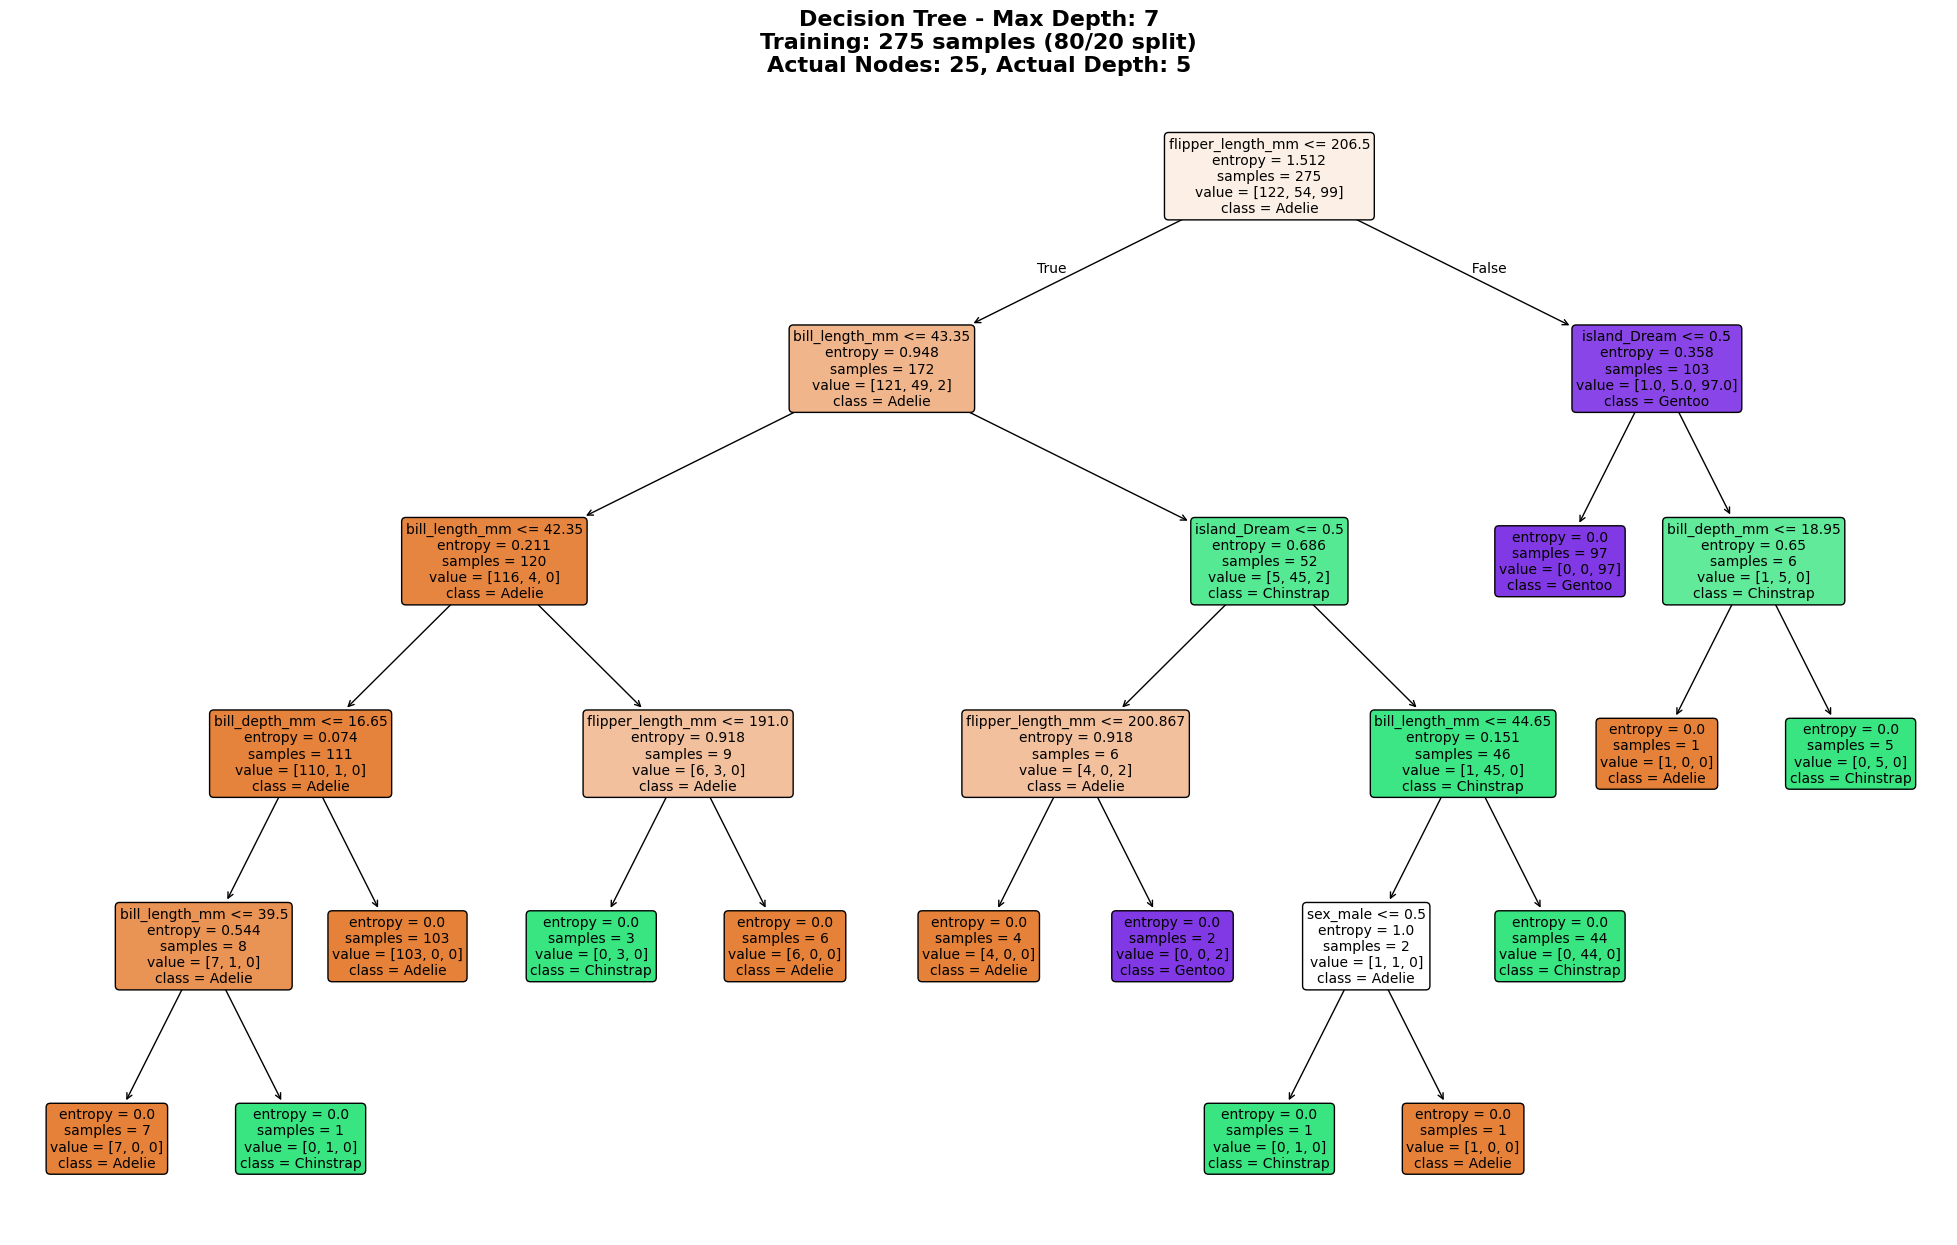

Tree Statistics:
  - Max Depth Setting: 7
  - Actual Depth: 5
  - Nodes: 25
  - Leaves: 13
  - Test Accuracy: 0.9855

Completed visualization of decision trees for 7 different depths!


In [14]:
# Part B: Create Decision Trees for Different Depths (None, 2, 3, 4, 5, 6, 7)
print("\n" + "="*80)
print("PART B: DECISION TREES FOR DIFFERENT DEPTHS")
print("="*80)

# Use the 80/20 split (index 2) for depth analysis as it's most commonly used
X_train_depth, X_test_depth, y_train_depth, y_test_depth = splits[2]
depths = [None, 2, 3, 4, 5, 6, 7]

print(f"Using Split 3 (80/20): {X_train_depth.shape[0]} training, {X_test_depth.shape[0]} test samples")

# Train and visualize decision tree for each depth
for depth in depths:
    depth_label = "Unlimited" if depth is None else str(depth)
    print(f"\n--- Creating Decision Tree with Max Depth: {depth_label} ---")
    
    # Train decision tree with specific depth
    model = train_decision_tree(X_train_depth, y_train_depth, depth=depth)
    
    # Get feature names and class names
    feature_names = X.columns.tolist()
    class_names = sorted(y.unique().tolist())
    
    # Create tree visualization
    plt.figure(figsize=(25, 15))
    plot_tree(model, 
              feature_names=feature_names, 
              class_names=class_names, 
              filled=True, 
              rounded=True,
              fontsize=10)
    
    plt.title(f"Decision Tree - Max Depth: {depth_label}\n"
              f"Training: {X_train_depth.shape[0]} samples (80/20 split)\n"
              f"Actual Nodes: {model.tree_.node_count}, Actual Depth: {model.tree_.max_depth}",
              fontsize=16, fontweight='bold')
    
    # Save the tree
    depth_filename = "unlimited" if depth is None else f"depth_{depth}"
    tree_path = f"../../results/palmer_penguins/decision_tree/tree_{depth_filename}.png"
    plt.savefig(tree_path, dpi=300, bbox_inches='tight')
    print(f"Saved decision tree to: {tree_path}")
    
    plt.show()
    
    # Print tree statistics
    print(f"Tree Statistics:")
    print(f"  - Max Depth Setting: {depth_label}")
    print(f"  - Actual Depth: {model.tree_.max_depth}")
    print(f"  - Nodes: {model.tree_.node_count}")
    print(f"  - Leaves: {model.tree_.n_leaves}")
    
    # Make predictions and show accuracy
    y_pred = model.predict(X_test_depth)
    accuracy = accuracy_score(y_test_depth, y_pred)
    print(f"  - Test Accuracy: {accuracy:.4f}")

print(f"\nCompleted visualization of decision trees for {len(depths)} different depths!")

In [15]:
# Part C: Summary Comparison of All Decision Trees
print("\n" + "="*80)
print("PART C: SUMMARY COMPARISON OF DECISION TREES")
print("="*80)

# Create summary tables
print("\n1. Summary of Trees by Split Ratio:")
print("-" * 60)

split_summary = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = train_decision_tree(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    split_summary.append({
        'Split Ratio': split_ratios[i],
        'Train Size': X_train.shape[0],
        'Test Size': X_test.shape[0],
        'Tree Nodes': model.tree_.node_count,
        'Tree Depth': model.tree_.max_depth,
        'Tree Leaves': model.tree_.n_leaves,
        'Test Accuracy': f"{accuracy:.4f}"
    })

split_summary_df = pd.DataFrame(split_summary)
print(split_summary_df.to_string(index=False))

# Save split summary
split_summary_df.to_csv("../../results/palmer_penguins/decision_tree/summary_by_splits.csv", index=False)
print(f"\nSaved split summary to: ../../results/palmer_penguins/decision_tree/summary_by_splits.csv")

print("\n2. Summary of Trees by Depth:")
print("-" * 60)

depth_summary = []
X_train_depth, X_test_depth, y_train_depth, y_test_depth = splits[2]  # 80/20 split

for depth in depths:
    depth_label = "Unlimited" if depth is None else str(depth)
    model = train_decision_tree(X_train_depth, y_train_depth, depth=depth)
    y_pred = model.predict(X_test_depth)
    accuracy = accuracy_score(y_test_depth, y_pred)
    
    depth_summary.append({
        'Max Depth Setting': depth_label,
        'Actual Depth': model.tree_.max_depth,
        'Tree Nodes': model.tree_.node_count,
        'Tree Leaves': model.tree_.n_leaves,
        'Test Accuracy': f"{accuracy:.4f}"
    })

depth_summary_df = pd.DataFrame(depth_summary)
print(depth_summary_df.to_string(index=False))

# Save depth summary
depth_summary_df.to_csv("../../results/palmer_penguins/decision_tree/summary_by_depths.csv", index=False)
print(f"\nSaved depth summary to: ../../results/palmer_penguins/decision_tree/summary_by_depths.csv")

print("\n" + "="*80)
print("DECISION TREE VISUALIZATION COMPLETED!")
print("="*80)
print("Generated Files:")
print("1. Decision trees for 4 different split ratios (40/60, 60/40, 80/20, 90/10)")
print("2. Decision trees for 7 different depths (None, 2, 3, 4, 5, 6, 7)")
print("3. Summary tables saved as CSV files")
print("4. All visualizations saved in: ../../results/palmer_penguins/decision_tree/")
print("="*80)


PART C: SUMMARY COMPARISON OF DECISION TREES

1. Summary of Trees by Split Ratio:
------------------------------------------------------------
Split Ratio  Train Size  Test Size  Tree Nodes  Tree Depth  Tree Leaves Test Accuracy
      40-60         137        207          13           5            7        0.9517
      60-40         206        138          17           4            9        0.9783
      80-20         275         69          25           5           13        0.9855
      90-10         309         35          25           5           13        1.0000

Saved split summary to: ../../results/palmer_penguins/decision_tree/summary_by_splits.csv

2. Summary of Trees by Depth:
------------------------------------------------------------
Max Depth Setting  Actual Depth  Tree Nodes  Tree Leaves Test Accuracy
        Unlimited             5          25           13        0.9855
                2             2           7            4        0.9710
                3             

# Direct Implementation of Analysis

To ensure that the analysis can be completed without relying on external utilities, let's implement the analysis directly in the notebook.

Step 1: Loading and preprocessing data...
Original dataset head:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Missing values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Processed features:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mas

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\15704480

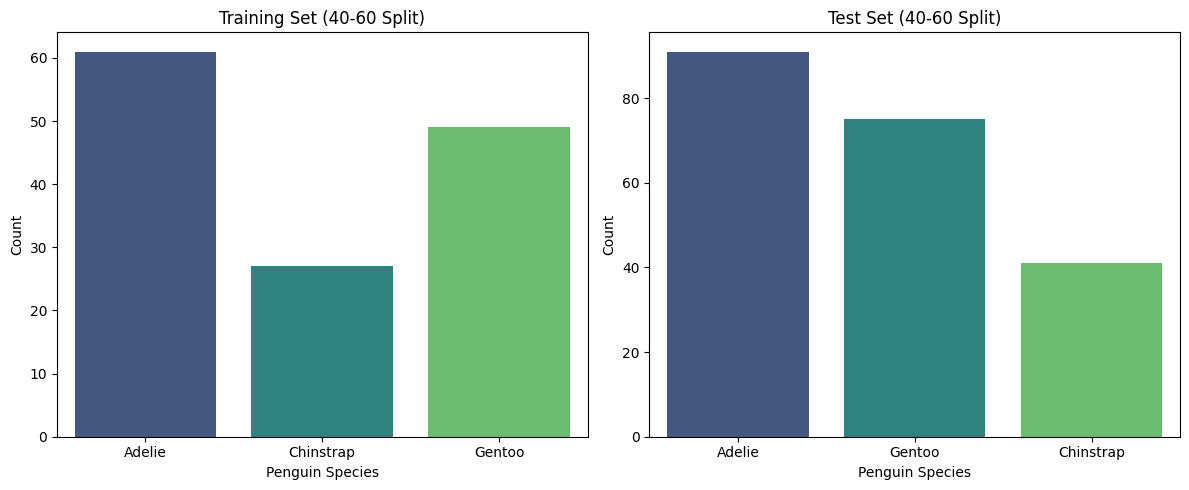

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


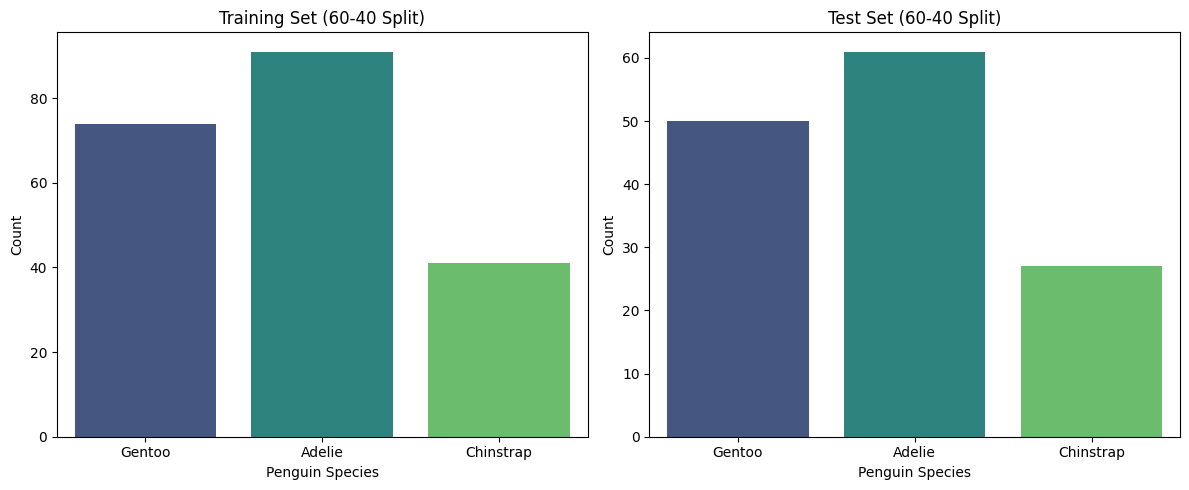

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


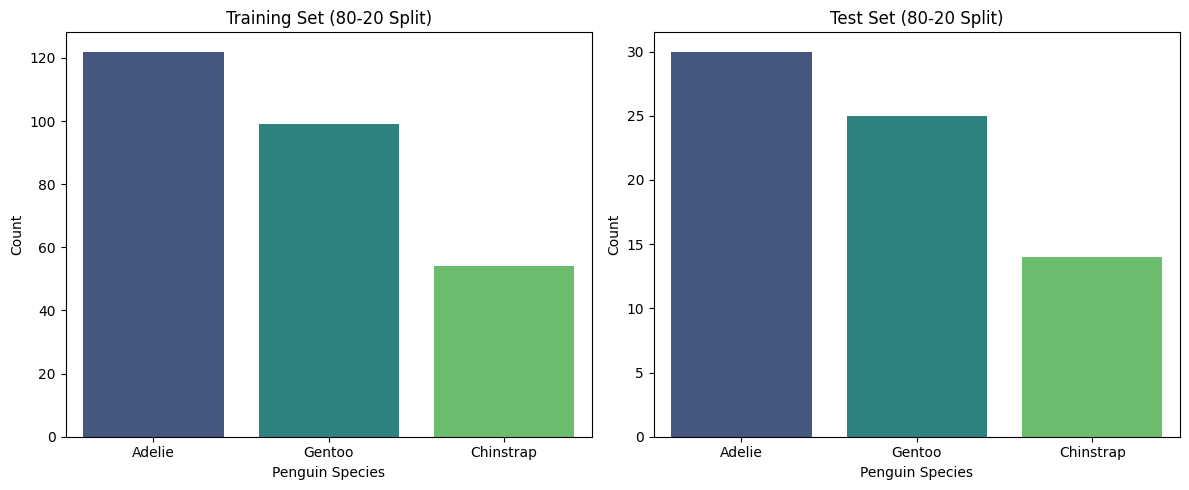

C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axs[0], palette="viridis")
C:\Users\khanh\AppData\Local\Temp\ipykernel_17008\1570448071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axs[1], palette="viridis")


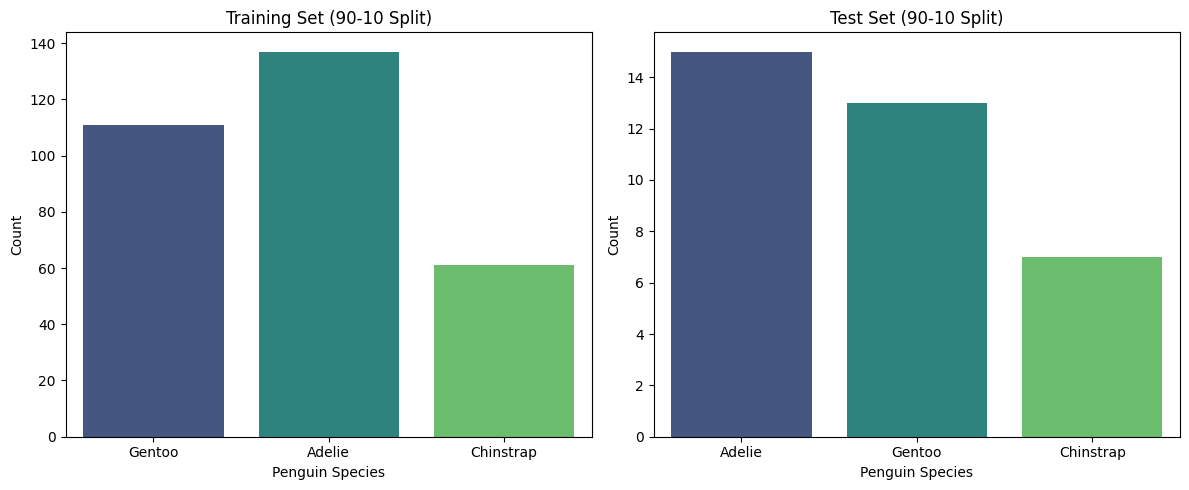


Step 4: Training decision tree models...
Training model on split 1 (40-60)...
Model trained with 13 nodes
Training model on split 2 (60-40)...
Model trained with 17 nodes
Training model on split 3 (80-20)...
Model trained with 25 nodes
Training model on split 4 (90-10)...
Model trained with 25 nodes

Step 5: Evaluating models...

Evaluating model trained on split 1 (40-60):
Test Accuracy: 0.9517

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        91
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       0.96      0.92      0.94        75

    accuracy                           0.95       207
   macro avg       0.95      0.96      0.95       207
weighted avg       0.95      0.95      0.95       207



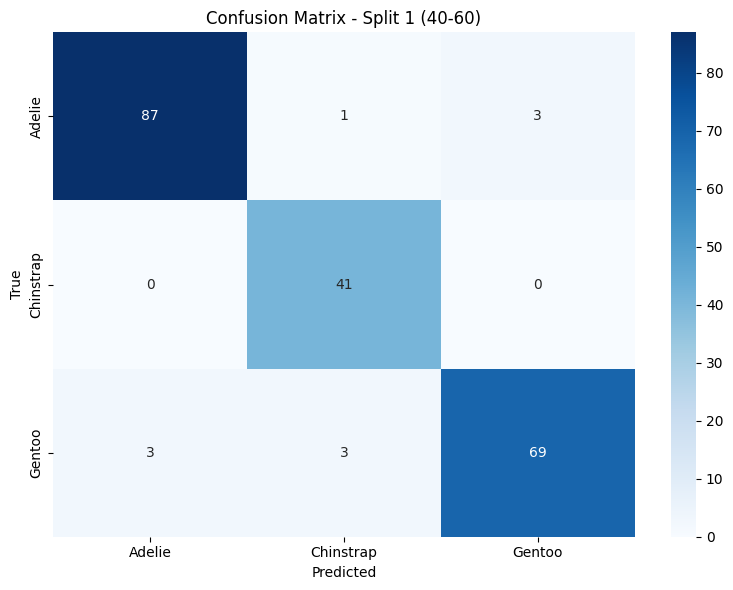


Evaluating model trained on split 2 (60-40):
Test Accuracy: 0.9783

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        61
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       0.98      1.00      0.99        50

    accuracy                           0.98       138
   macro avg       0.97      0.98      0.98       138
weighted avg       0.98      0.98      0.98       138



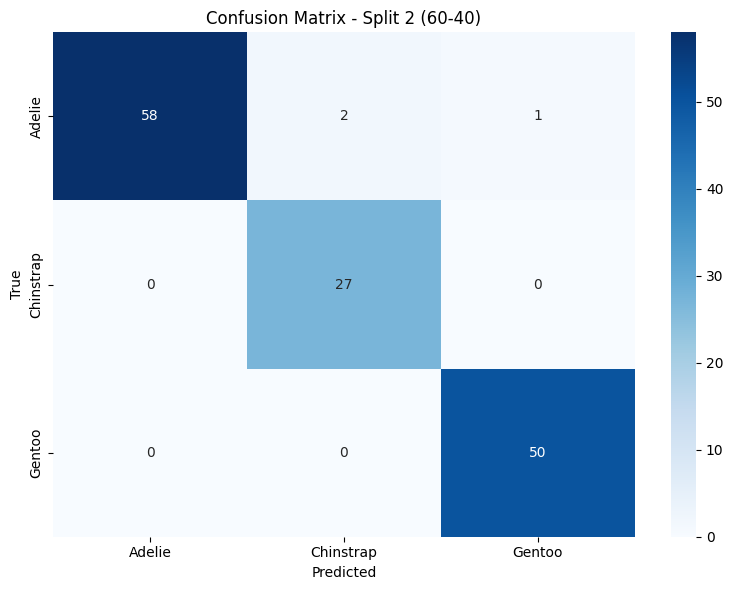


Evaluating model trained on split 3 (80-20):
Test Accuracy: 0.9855

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



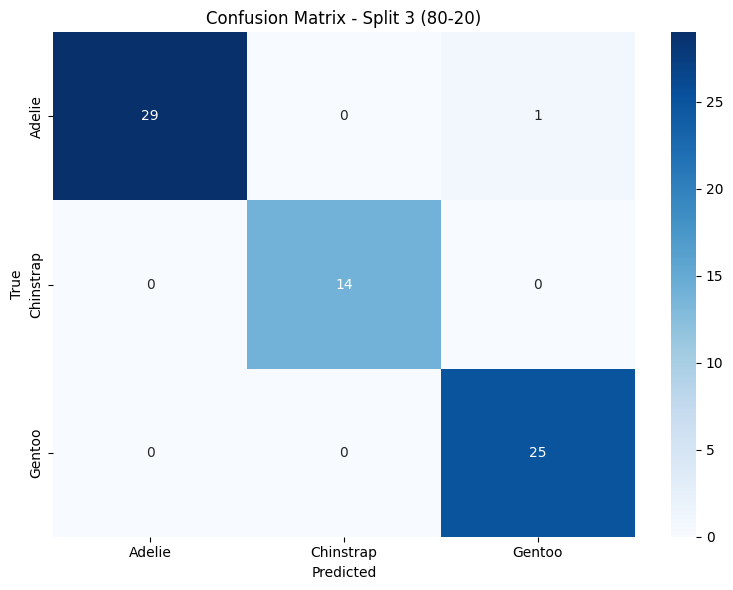


Evaluating model trained on split 4 (90-10):
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



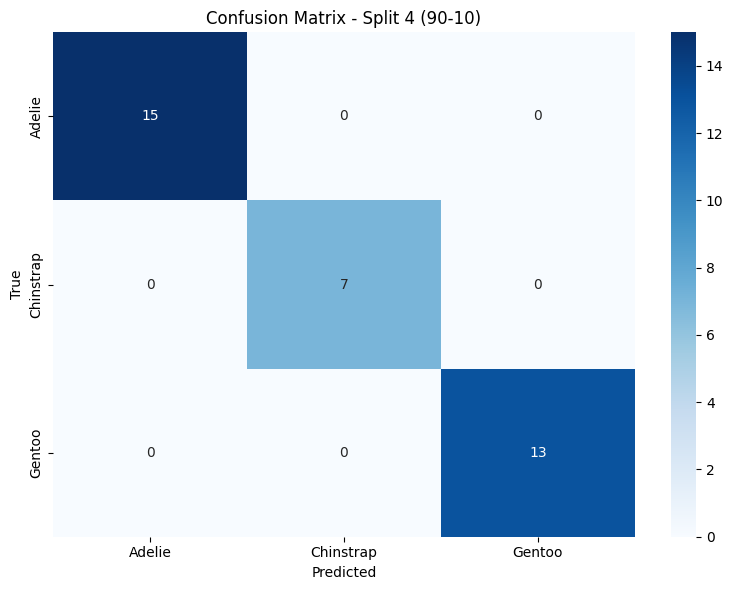


Step 6: Analyzing the effect of tree depth...
Training tree with depth = Unlimited...
Accuracy: 0.9855
Training tree with depth = 2...
Accuracy: 0.9710
Training tree with depth = 3...
Accuracy: 0.9710
Training tree with depth = 4...
Accuracy: 0.9855
Training tree with depth = 5...
Accuracy: 0.9855
Training tree with depth = 6...
Accuracy: 0.9855
Training tree with depth = 7...
Accuracy: 0.9855


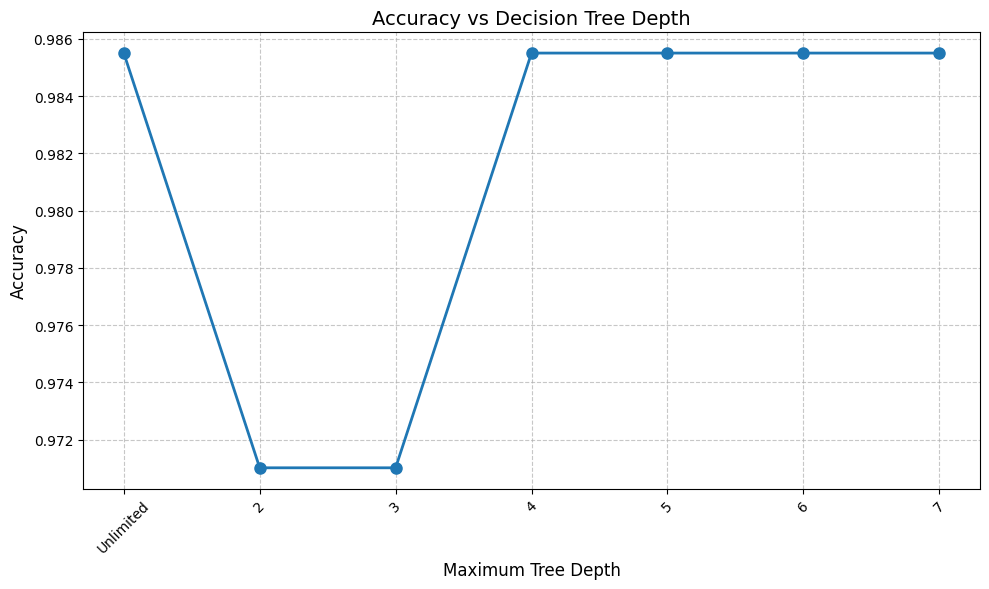


Best tree depth: Unlimited with accuracy 0.9855


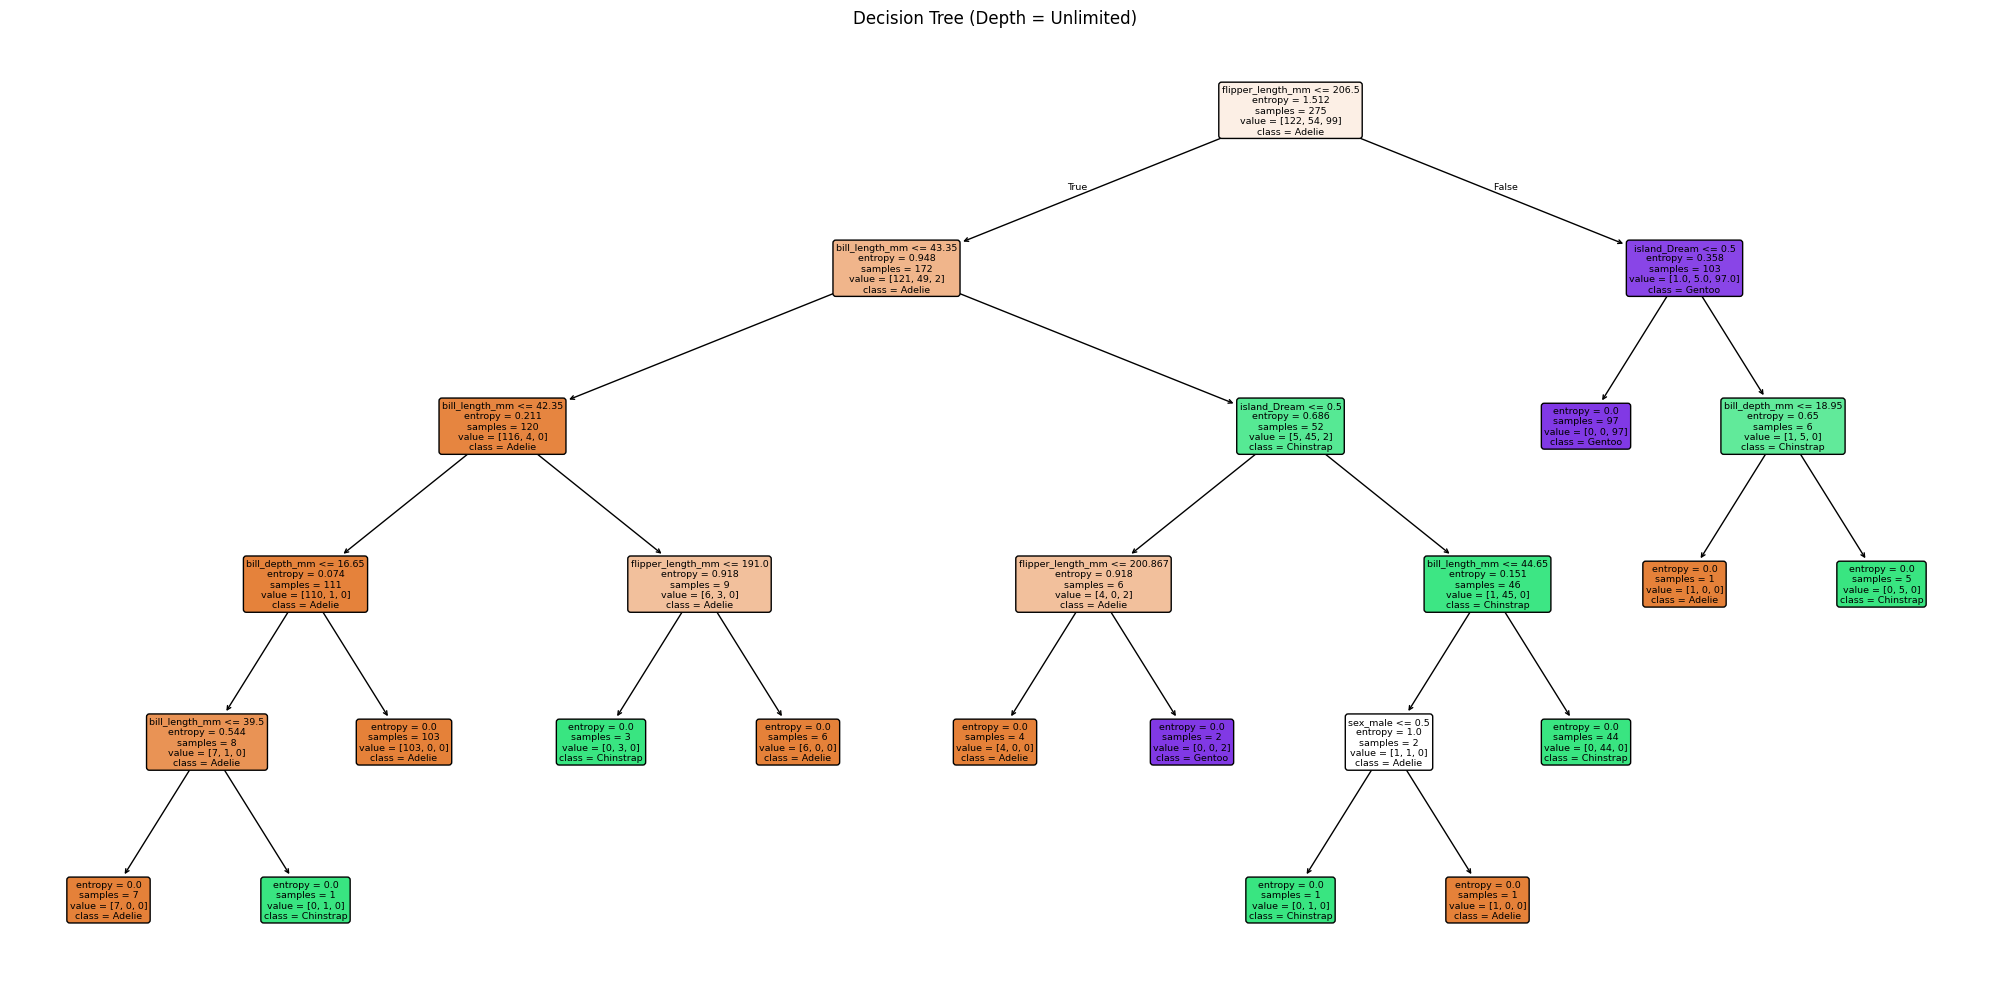


Summary of Results:
  Split Ratio  Training Samples  Test Samples  Accuracy
0       40-60               137           207  0.951691
1       60-40               206           138  0.978261
2       80-20               275            69  0.985507
3       90-10               309            35  1.000000

Analysis completed successfully!


In [ ]:
# Complete implementation of Palmer Penguins analysis
# This cell contains all necessary code to run the analysis without external dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create organized directories for output
base_results_dir = "../../results/palmer_penguins"
base_viz_dir = "../../visualizations/palmer_penguins"

directories = [
    f"{base_results_dir}/class_distributions",
    f"{base_results_dir}/confusion_matrices", 
    f"{base_results_dir}/accuracy_tables",
    f"{base_results_dir}/classification_reports",
    f"{base_results_dir}/decision_tree",
    f"{base_viz_dir}/class_distributions",
    f"{base_viz_dir}/confusion_matrices",
    f"{base_viz_dir}/accuracy_plots",
    f"{base_viz_dir}/decision_tree"
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)

print("Created organized output directories")

# Step 1: Load and preprocess data
print("Step 1: Loading and preprocessing data...")
data_path = "../../datasets/palmer_penguins/penguins.csv"
df = pd.read_csv(data_path)

# Display original data
print("Original dataset head:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Impute numeric columns
numeric_cols = df.select_dtypes(include='number').columns
imputer = IterativeImputer(random_state=42, max_iter=10)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Fill missing categorical values
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# One-hot encoding
df = pd.get_dummies(df, columns=['sex', 'island'], drop_first=True)

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

print("\nProcessed features:")
print(X.head())
print("\nTarget distribution:")
print(y.value_counts())

# Step 2: Create multiple train/test splits
print("\nStep 2: Creating multiple train/test splits...")
split_ratios = ["40-60", "60-40", "80-20", "90-10"]
ratio_values = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
splits = []

for train_size, _ in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y, random_state=42)
    splits.append((X_train, X_test, y_train, y_test))

print(f"Created {len(splits)} different train/test splits with ratios: {', '.join(split_ratios)}")

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Split {i+1} ({split_ratios[i]}):")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Test set: {X_test.shape[0]} samples")

# Step 3: Visualize class distribution for each split
print("\nStep 3: Visualizing class distribution...")

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train set distribution
    sns.countplot(x=y_train, ax=axs[0], palette="viridis")
    axs[0].set_title(f"Training Set ({split_ratios[i]} Split)")
    axs[0].set_xlabel("Penguin Species")
    axs[0].set_ylabel("Count")
    
    # Test set distribution
    sns.countplot(x=y_test, ax=axs[1], palette="viridis")
    axs[1].set_title(f"Test Set ({split_ratios[i]} Split)")
    axs[1].set_xlabel("Penguin Species")
    axs[1].set_ylabel("Count")
    
    plt.tight_layout()
    
    # Save to organized subdirectory
    class_dist_path = f"{base_results_dir}/class_distributions/class_distribution_split_{i+1}_{split_ratios[i].replace('-', '_')}.png"
    plt.savefig(class_dist_path, dpi=300, bbox_inches='tight')
    print(f"Saved class distribution to {class_dist_path}")
    plt.show()

# Step 4: Train decision tree models
print("\nStep 4: Training decision tree models...")
models = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"Training model on split {i+1} ({split_ratios[i]})...")
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(X_train, y_train)
    models.append(model)
    print(f"Model trained with {model.tree_.node_count} nodes")

# Step 5: Evaluate models
print("\nStep 5: Evaluating models...")
evaluation_results = []

for i, ((X_train, X_test, y_train, y_test), model) in enumerate(zip(splits, models)):
    print(f"\nEvaluating model trained on split {i+1} ({split_ratios[i]}):")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    # Generate confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Save classification report to organized subdirectory
    report_path = f"{base_results_dir}/classification_reports/classification_report_split_{i+1}_{split_ratios[i].replace('-', '_')}.txt"
    with open(report_path, "w") as f:
        f.write(f"Classification Report - Split {i+1} ({split_ratios[i]})\n")
        f.write("="*50 + "\n")
        f.write(report + "\n")
        f.write(f"Test Accuracy: {accuracy:.4f}\n")
        f.write("Confusion Matrix:\n" + np.array2string(matrix))
    print(f"Saved classification report to {report_path}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix - Split {i+1} ({split_ratios[i]})")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    
    # Save to organized subdirectory
    confusion_path = f"{base_results_dir}/confusion_matrices/confusion_matrix_split_{i+1}_{split_ratios[i].replace('-', '_')}.png"
    plt.savefig(confusion_path, dpi=300, bbox_inches='tight')
    print(f"Saved confusion matrix to {confusion_path}")
    plt.show()
    
    # Store results
    evaluation_results.append({
        "accuracy": accuracy,
        "report": report,
        "matrix": matrix
    })

# Step 6: Analyze the effect of tree depth
print("\nStep 6: Analyzing the effect of tree depth...")
# Use the 80/20 split (index 2) for depth analysis
X_train, X_test, y_train, y_test = splits[2]
depths = [None, 2, 3, 4, 5, 6, 7]
depth_labels = ['Unlimited' if d is None else str(d) for d in depths]
accuracy_values = []

for d in depths:
    print(f"Training tree with depth = {d if d is not None else 'Unlimited'}...")
    model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    print(f"Accuracy: {accuracy:.4f}")

# Save depth analysis results to organized subdirectory
depth_results_df = pd.DataFrame({
    'max_depth': depth_labels,
    'accuracy': accuracy_values
})
depth_results_path = f"{base_results_dir}/accuracy_tables/accuracy_by_depth.csv"
depth_results_df.to_csv(depth_results_path, index=False)
print(f"Saved depth analysis to {depth_results_path}")

# Plot accuracy vs depth
plt.figure(figsize=(10, 6))
plt.plot(depth_labels, accuracy_values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy vs Decision Tree Depth", fontsize=14)
plt.xlabel("Maximum Tree Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Save to organized subdirectory
accuracy_plot_path = f"{base_results_dir}/accuracy_tables/accuracy_vs_depth.png"
plt.savefig(accuracy_plot_path, dpi=300, bbox_inches='tight')
print(f"Saved accuracy plot to {accuracy_plot_path}")
plt.show()

# Visualize the best tree
best_idx = np.argmax(accuracy_values)
best_depth = depths[best_idx]
print(f"\nBest tree depth: {best_depth if best_depth is not None else 'Unlimited'} with accuracy {accuracy_values[best_idx]:.4f}")

best_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

# Get feature names and class names
feature_names = X.columns.tolist()
class_names = sorted(y.unique().tolist())

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title(f"Decision Tree (Depth = {'Unlimited' if best_depth is None else best_depth})")
plt.tight_layout()

# Save to organized subdirectory
best_tree_path = f"{base_results_dir}/decision_tree/best_decision_tree_depth_{best_depth if best_depth is not None else 'unlimited'}.png"
plt.savefig(best_tree_path, dpi=300, bbox_inches='tight')
print(f"Saved best decision tree to {best_tree_path}")
plt.show()

# Create summary table
summary_data = {
    'Split Ratio': split_ratios,
    'Training Samples': [X_train.shape[0] for X_train, _, _, _ in splits],
    'Test Samples': [X_test.shape[0] for _, X_test, _, _ in splits],
    'Accuracy': [result['accuracy'] for result in evaluation_results]
}

summary_df = pd.DataFrame(summary_data)
summary_path = f"{base_results_dir}/accuracy_tables/summary_results_by_splits.csv"
summary_df.to_csv(summary_path, index=False)
print(f"Saved summary results to {summary_path}")

print("\nSummary of Results:")
print(summary_df)

print("\nAnalysis completed successfully!")

# Additional: Create detailed decision tree visualizations
print("\n" + "="*80)
print("CREATING DETAILED DECISION TREE VISUALIZATIONS")
print("="*80)

# Part A: Decision Trees for Each Split
print("\nPart A: Creating decision trees for each split ratio...")
split_tree_summary = []

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    print(f"\nCreating tree for split {i+1}: {split_ratios[i]}")
    
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(X_train, y_train)
    
    # Create visualization
    plt.figure(figsize=(25, 15))
    plot_tree(model, feature_names=feature_names, class_names=class_names, 
              filled=True, rounded=True, fontsize=10)
    plt.title(f"Decision Tree - Split {i+1} ({split_ratios[i]})\n"
              f"Training: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples\n"
              f"Tree Nodes: {model.tree_.node_count}, Max Depth: {model.tree_.max_depth}",
              fontsize=16, fontweight='bold')
    
    # Save to organized subdirectory
    tree_path = f"{base_results_dir}/decision_tree/tree_split_{i+1}_{split_ratios[i].replace('-', '_')}.png"
    plt.savefig(tree_path, dpi=300, bbox_inches='tight')
    print(f"Saved decision tree to {tree_path}")
    plt.show()
    
    # Calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    split_tree_summary.append({
        'Split Ratio': split_ratios[i],
        'Train Size': X_train.shape[0],
        'Test Size': X_test.shape[0],
        'Tree Nodes': model.tree_.node_count,
        'Tree Depth': model.tree_.max_depth,
        'Tree Leaves': model.tree_.n_leaves,
        'Test Accuracy': f"{accuracy:.4f}"
    })

# Part B: Decision Trees for Each Depth
print("\nPart B: Creating decision trees for each depth...")
X_train_80, X_test_80, y_train_80, y_test_80 = splits[2]  # Use 80/20 split
depths_detailed = [None, 2, 3, 4, 5, 6, 7]
depth_tree_summary = []

for depth in depths_detailed:
    depth_label = "Unlimited" if depth is None else str(depth)
    print(f"Creating tree with max depth: {depth_label}")
    
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    model.fit(X_train_80, y_train_80)
    
    # Create visualization
    plt.figure(figsize=(25, 15))
    plot_tree(model, feature_names=feature_names, class_names=class_names, 
              filled=True, rounded=True, fontsize=10)
    plt.title(f"Decision Tree - Max Depth: {depth_label}\n"
              f"Training: {X_train_80.shape[0]} samples (80/20 split)\n"
              f"Actual Nodes: {model.tree_.node_count}, Actual Depth: {model.tree_.max_depth}",
              fontsize=16, fontweight='bold')
    
    # Save to organized subdirectory
    depth_filename = "unlimited" if depth is None else f"depth_{depth}"
    tree_path = f"{base_results_dir}/decision_tree/tree_{depth_filename}.png"
    plt.savefig(tree_path, dpi=300, bbox_inches='tight')
    print(f"Saved decision tree to {tree_path}")
    plt.show()
    
    # Calculate accuracy
    y_pred = model.predict(X_test_80)
    accuracy = accuracy_score(y_test_80, y_pred)
    
    depth_tree_summary.append({
        'Max Depth Setting': depth_label,
        'Actual Depth': model.tree_.max_depth,
        'Tree Nodes': model.tree_.node_count,
        'Tree Leaves': model.tree_.n_leaves,
        'Test Accuracy': f"{accuracy:.4f}"
    })

# Save summary tables to organized subdirectories
split_summary_df = pd.DataFrame(split_tree_summary)
depth_summary_df = pd.DataFrame(depth_tree_summary)

split_summary_path = f"{base_results_dir}/decision_tree/summary_by_splits.csv"
depth_summary_path = f"{base_results_dir}/decision_tree/summary_by_depths.csv"

split_summary_df.to_csv(split_summary_path, index=False)
depth_summary_df.to_csv(depth_summary_path, index=False)

print(f"\nSaved split summary to {split_summary_path}")
print(f"Saved depth summary to {depth_summary_path}")

print("\nSplit Summary:")
print(split_summary_df.to_string(index=False))

print("\nDepth Summary:")
print(depth_summary_df.to_string(index=False))

print("\n" + "="*80)
print("ALL DECISION TREE VISUALIZATIONS COMPLETED!")
print("="*80)
print("Generated Files Organization:")
print(f"├── {base_results_dir}/")
print("│   ├── class_distributions/")
print("│   │   └── class_distribution_split_[1-4]_[ratio].png")
print("│   ├── confusion_matrices/")
print("│   │   └── confusion_matrix_split_[1-4]_[ratio].png")
print("│   ├── classification_reports/")
print("│   │   └── classification_report_split_[1-4]_[ratio].txt")
print("│   ├── accuracy_tables/")
print("│   │   ├── accuracy_by_depth.csv")
print("│   │   ├── accuracy_vs_depth.png")
print("│   │   └── summary_results_by_splits.csv")
print("│   └── decision_tree/")
print("│       ├── tree_split_[1-4]_[ratio].png")
print("│       ├── tree_[depth/unlimited].png")
print("│       ├── best_decision_tree_depth_[depth].png")
print("│       ├── summary_by_splits.csv")
print("│       └── summary_by_depths.csv")
print("="*80)